# 시계열 자료분석 과제 2

`학번:` 201922034

`학과:` 통계학과

`이름:` 장윤서

In [2]:
library(forecast); #ses 단순지수 평활
library(data.table);
library(ggplot2);
library(lmtest) #dwtest
library(TTR);
library(tidyverse);

### 1번

In [3]:
z <- scan('mindex.txt')
mindex <- ts(z, start = c(1986, 1), frequency = 12)
tmp.dat <- data.frame(day = seq.Date(
  as.Date('1986-01-01'),
  by = 'month',
  length.out = length(z)
),
ind = z)

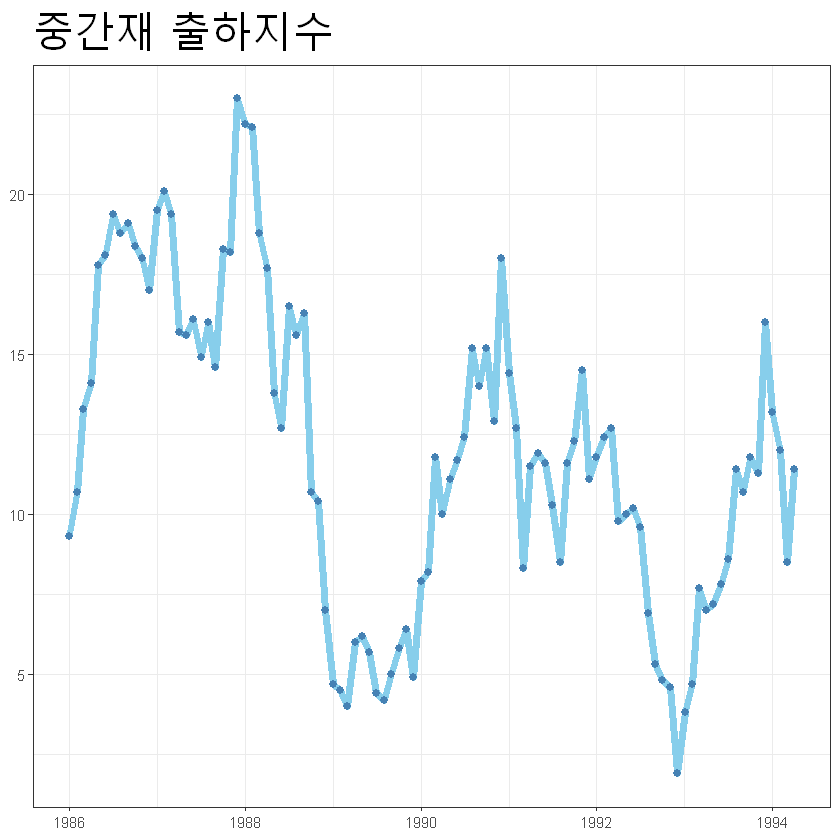

In [5]:
#시도표, 불규칙 성분만 있는 것 처럼 보인다.
ggplot(tmp.dat, aes(day, ind)) + geom_line(col = 'skyblue', lwd = 2) +
  geom_point(col = 'steelblue', cex = 2) +
  ggtitle("중간재 출하지수") +
  theme_bw() +
  theme(plot.title = element_text(size = 30),
        axis.title = element_blank())

In [5]:
#for w = 0.6
S0_1 = 15 #초기 평활값
w = 0.6 #평활상수
S1_1 = w * z[1] + (1 - w) * S0_1 #단순지수 평활의 논리
S1_1 #시점 1에서의 1시차 후 예측값

[1] 11.58

In [6]:
S2_1 = w * z[2] + (1 - w) * S1_1 #이를 S2_1 에 대하여 적용
S2_1 #시점 2에서의 1시차 후 예측값값

#판단.
#S99_1을 구하려면 그 전까지의 모든 값을 알아야한다.
#for문을 이용하여 직접 구해보자

[1] 11.052

In [7]:
Sn_1 <- c()  # n 길이의 NA로 초기화된 벡터 생성
Sn_1

n <- length(z)

Sn_1[1] = 15 #초깃값 삽입입

for (i in 2:(n + 1)) {
  #단순지수 평활법을 적용, 첫 자리에 초기 평활이 들어갔으므로 루핑을 1번 더 해준다.
  Sn_1[i] = w * z[i - 1] + (1 - w) * Sn_1[i - 1]
}

Sn_1 %>% head()

NULL

[1] 15.00000 11.58000 11.05200 12.40080 13.42032 16.04813

In [8]:
#이와 같은 계산을 반복한다면.. 99와 100번째 벡터의 원소가
#각각 시점 9에서 예측한 한 시차 후의 값, 시점 99에서 예측한 한 시차 후의 값이다.
Sn_1[c(2, 3, 99, 100)] #Answer

[1] 11.58000 11.05200 12.62628 10.15051

In [9]:
#w= 0.2 인 경우
Sn_1_0.2 <- c()  # n 길이의 NA로 초기화된 벡터 생성

Sn_1_0.2[1] = 15 #초깃값 삽입입

w = 0.2

for (i in 2:(n + 1)) {
  #단순지수 평활법을 적용, 첫 자리에 초기 평활이 들어갔으므로 루핑을 1번 더 해준다.
  Sn_1_0.2[i] = w * z[i - 1] + (1 - w) * Sn_1_0.2[i - 1]
}

Sn_1_0.2 %>% head() #w= 0.2 일 때 단순지수평활통계값들.
Sn_1_0.2[c(2, 3, 99, 100)] #Answer

[1] 15.00000 13.86000 13.22800 13.24240 13.41392 14.29114

[1] 13.86000 13.22800 11.46773 10.87419

### 2번

In [86]:
female <- scan('female.txt')
export <- scan('export.txt')

#### 2-1

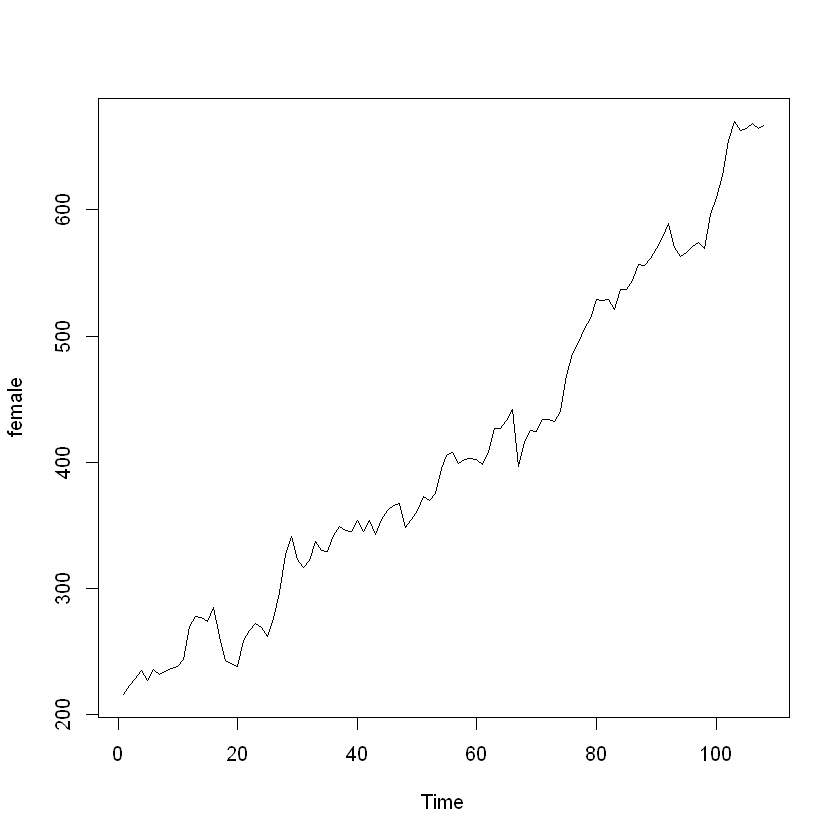

In [87]:
#각각에 대해서 일단 시도표를 그려보자
plot.ts(female)
#불규칙 성분과 추세성분으로 구성되어있다.

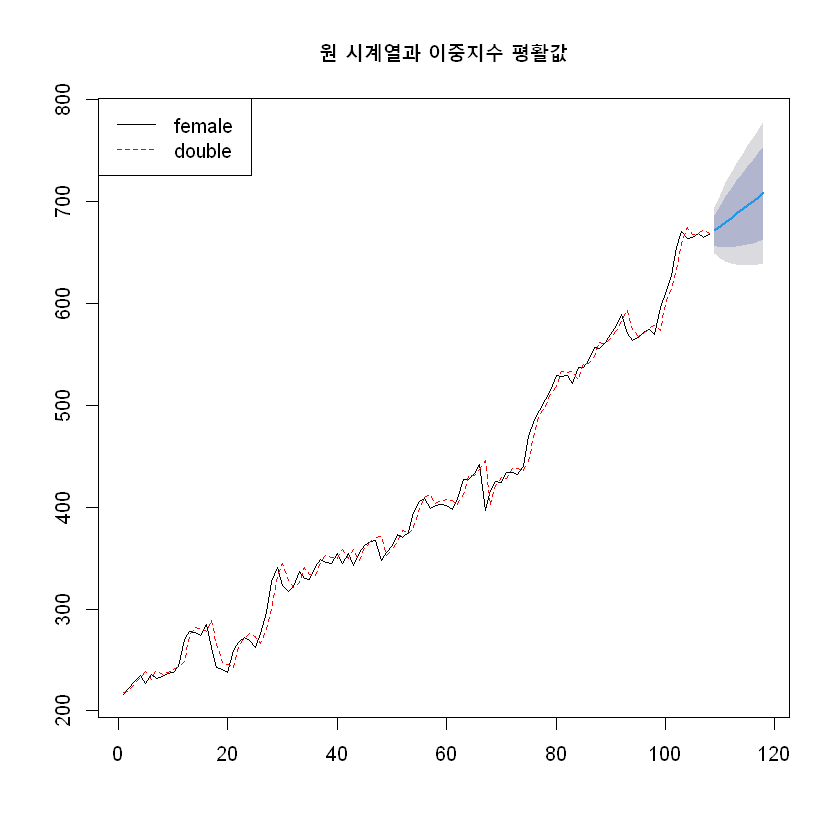

In [88]:
female <- ts(female) #ts 객체로 변환
#예측력을 비교하는 것이 문제의 논점.
#따라서 예측오차 제곱합을 최저로 해주는
#HoltWinters를 통하여 평활 후 분석.
#이중지수평활 통계량의 초기값

fit2_1 <- holt(female)
#위 모델에서 alpha 와 beta가 최적화 되었다

plot(
  fit2_1,
  xlab = '',
  ylab = '',
  lty = 1,
  main = '원 시계열과 이중지수 평활값'
)
lines(fit2_1$fitted, col = 'red', lty = 2)
legend(
  'topleft',
  lty = 1:2,
  col = c('black', 'red'),
  legend = c('female' , 'double')
)

In [89]:
fit2_1 %>% summary()


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = female) 

  Smoothing parameters:
    alpha = 0.9825 
    beta  = 1e-04 

  Initial states:
    l = 214.2297 
    b = 4.1229 

  sigma:  11.4927

     AIC     AICc      BIC 
1039.003 1039.592 1052.414 

Error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.07401668 11.27783 8.327451 -0.1223346 2.247855 0.9082949
                  ACF1
Training set 0.1136706

Forecasts:
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
109       671.1459 656.4175 685.8743 648.6207 693.6711
110       675.2696 654.6212 695.9180 643.6907 706.8486
111       679.3933 654.1777 704.6089 640.8294 717.9572
112       683.5170 654.4423 712.5917 639.0511 727.9829
113       687.6407 655.1615 720.1199 637.9681 737.3133
114       691.7644 656.2047 727.3241 637.3805 746.1483
115       695.8881 657.4936 734.2826 637.1688 754.6074
116       700.0118 658.9774 741.0462 637.2551 762.7684


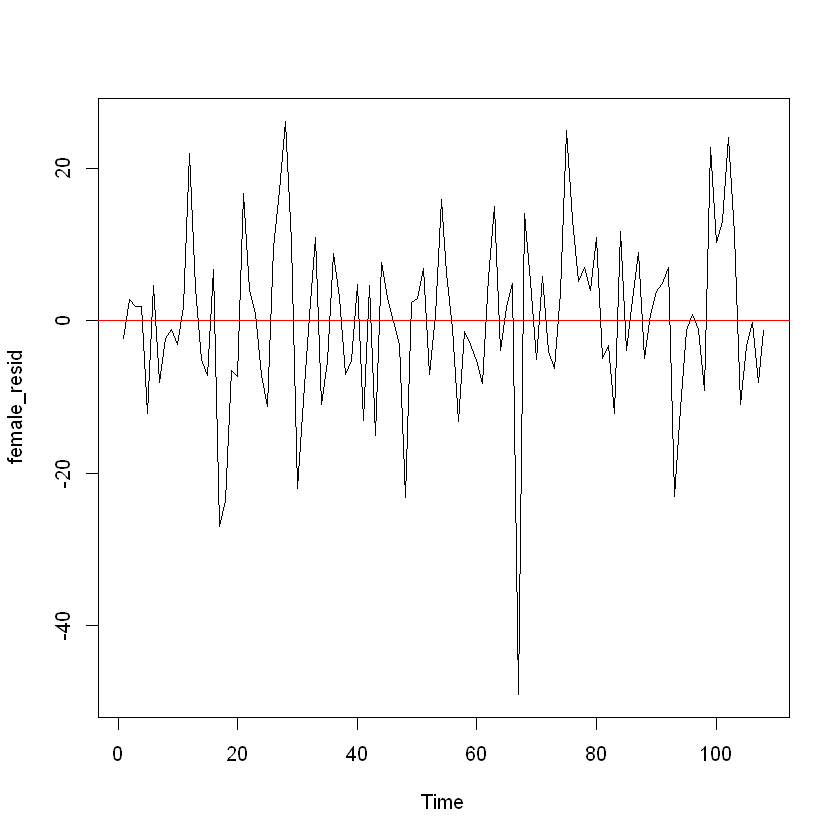

In [90]:
female_resid <- fit2_1$residuals #잔차.
#평활값과 시계열 자료의 차이인 예측 오차.

#잔차그림
plot(female_resid, type = 'l')
abline(h = 0, col = 'red')

In [91]:
#예측 오차는 독립일까?
dwtest(lm(female_resid ~ 1), alternative = 'two.sided')
#p-값이 0.232 이므로 오차들은 독립이다.


	Durbin-Watson test

data:  lm(female_resid ~ 1)
DW = 1.7721, p-value = 0.232
alternative hypothesis: true autocorrelation is not 0


In [92]:
#예측 오차의 평균은 0일까?
t.test(female_resid)
#p-값이 0.946 이므로 오차들의 평균은 0이다.


	One Sample t-test

data:  female_resid
t = 0.06789, df = 107, p-value = 0.946
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.087267  2.235301
sample estimates:
 mean of x 
0.07401668 


bptest를 시행할 순 없지만 (형식이 맞지 않는 것 같음..)
눈으로 확인하기에 분산이 변하는 것 같진 않고
일정 경계안에서 잔차가 있는 것 같다.

따라서 적용한 평활법은 적절하다고 판단할 수 있다.

In [93]:
#이동평균법을 통한 평활
#MA와 SMA는 결국 시점의 차이이므로 하나만 실행하여보도록 하자.
female_ma3 <- ma(female,3) #window size =3 

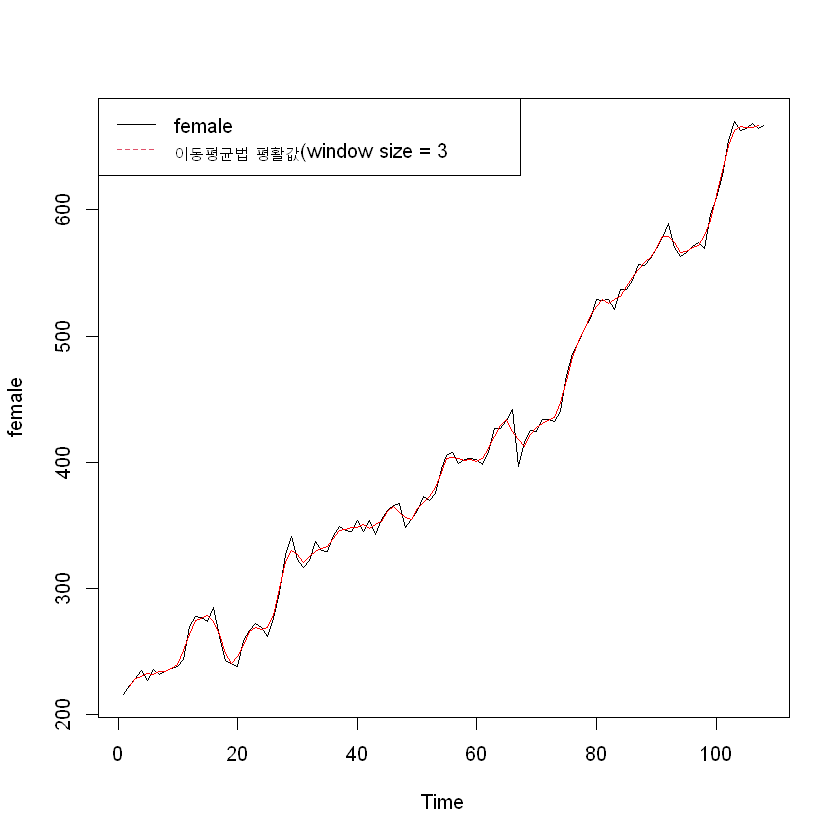

In [94]:
plot.ts(female)
lines(female_ma3, col = 'red')
legend(
  "topleft",
  lty = 1:2,
  col = 1:2,
  c("female", "이동평균법 평활값(window size = 3")
)

In [95]:
resid1 <- female[-c(1,length(female))] - female_ma3[-c(1,length(female_ma3))]

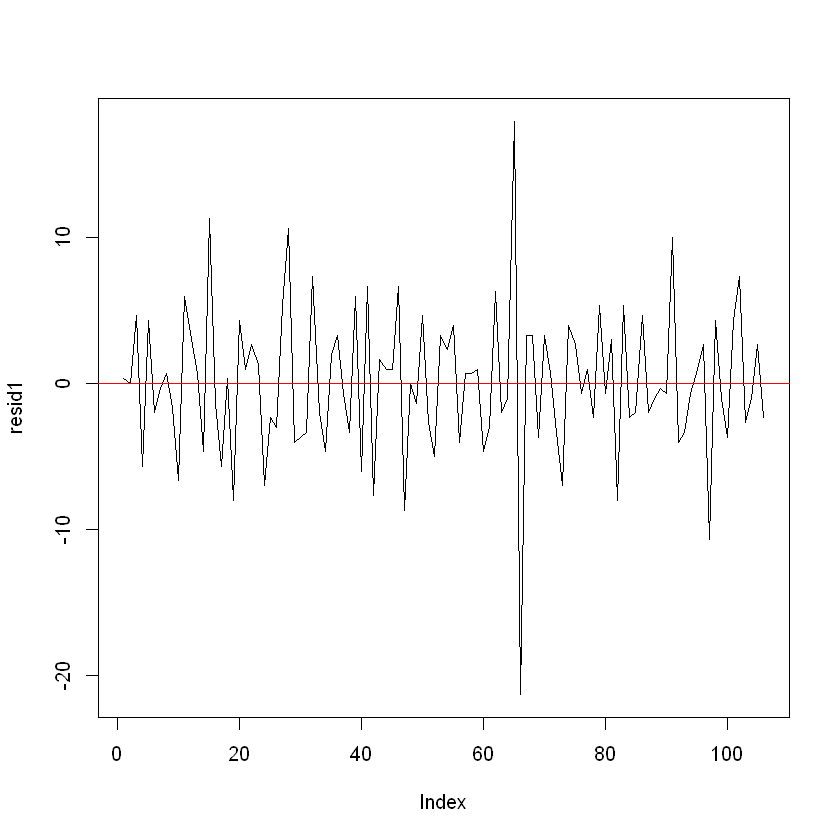

In [96]:
plot(resid1, type = 'l')
abline(h=0, col = 'red')

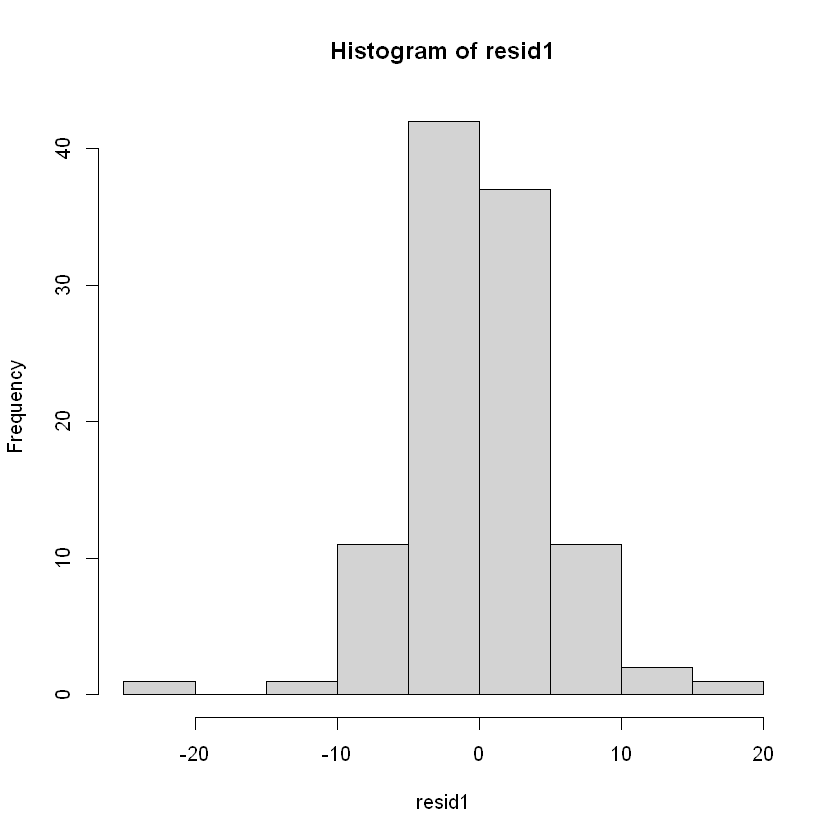

In [97]:
hist(resid1) #이동평균법을 이용한 평활의 잔차 히스토그램

In [98]:
t.test(resid1) #평균은 0 일까?


	One Sample t-test

data:  resid1
t = 0.025353, df = 105, p-value = 0.9798
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.9711856  0.9963428
sample estimates:
 mean of x 
0.01257862 


In [99]:
dwtest(lm(resid1 ~ 1)) #오차들은 무상관한가?


	Durbin-Watson test

data:  lm(resid1 ~ 1)
DW = 2.8117, p-value = 1
alternative hypothesis: true autocorrelation is greater than 0


In [100]:
mean(female_resid^2);mean(resid1^2)

[1] 127.1894

[1] 25.84696

In [101]:
#이동평균법은 예측보다 분해에 좀 더 적절한 기법이라 하였으므로 이중지수평활법만 레포트에 첨부하였습니다.

#### 2-2

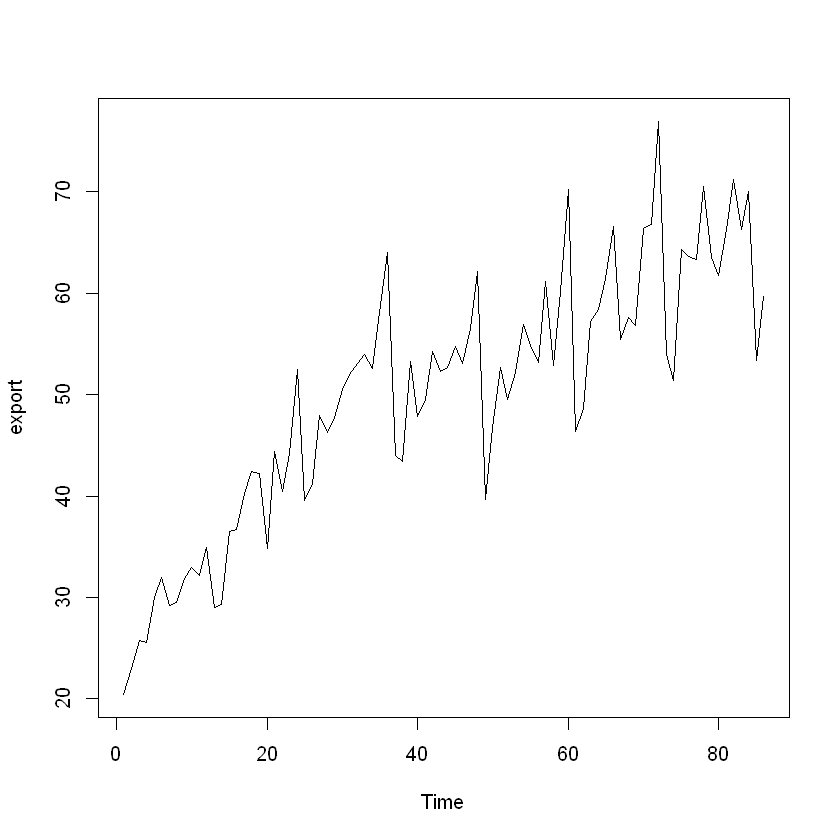

In [102]:
plot.ts(export) #시도표

불규칙 성분, 추세성분과 계절성분으로 이루어져 있다.

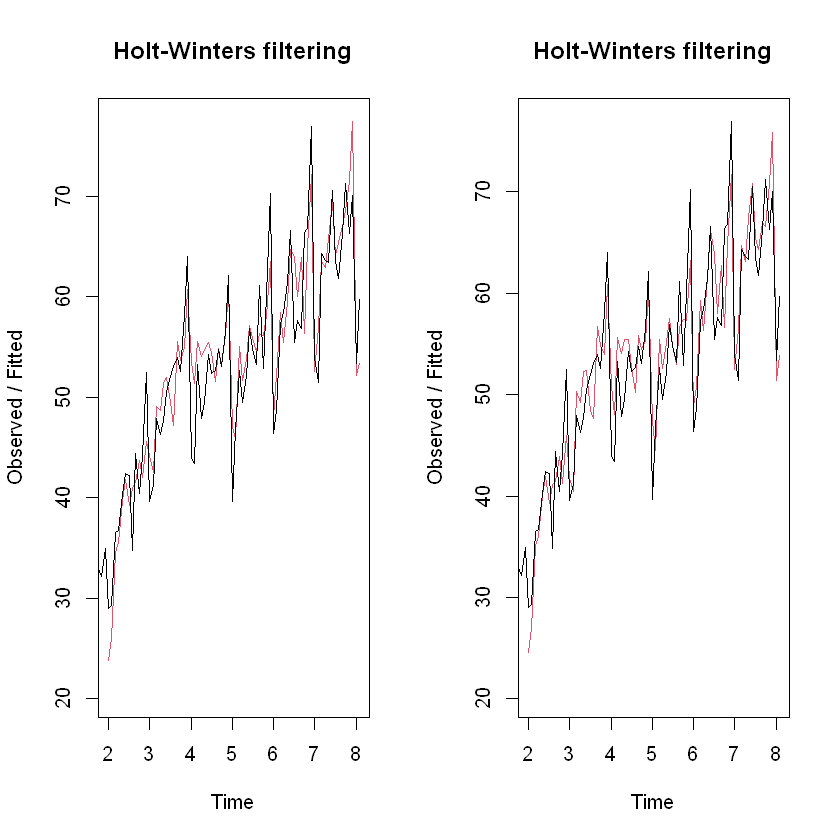

In [103]:
export <- ts(export, frequency = 12)
#계절성 고려 주기 부여

#가법 모형과 승법 모형 비교

fit2_2_add <- HoltWinters(export) #alpha,beta,gamma 모두 구함함
fit2_2_mult <- HoltWinters(export,
                           seasonal = 'multiplicative')

par(mfrow = c(1, 2))
plot(fit2_2_add) #원시계열과 가법모형을 이용한 평활값
plot(fit2_2_mult) #원시계열과 승법모형을 이용한 평활값

In [104]:
#예측의 관점에서 최적의 모형을 찾고 싶으므로
#SSE 즉 한 시점후 오차제곱합이 낮은 모형을 선택

c(fit2_2_add$SSE, fit2_2_mult$SSE)
fit2_2_mult #이 승법모형이 더 예측력이 좋다.

[1] 1135.422 1048.263

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = export, seasonal = "multiplicative")

Smoothing parameters:
 alpha: 0.4285887
 beta : 0.02606259
 gamma: 0.4083356

Coefficients:
          [,1]
a   68.7136998
b    0.5141142
s1   0.9879869
s2   0.9620299
s3   0.9996946
s4   1.0834386
s5   0.9897148
s6   0.9744549
s7   1.0319339
s8   1.0425559
s9   1.0357445
s10  1.1286956
s11  0.8073858
s12  0.8400441

In [105]:
c(fit2_2_mult$alpha , fit2_2_mult$beta, fit2_2_mult$gamma) 

alpha       beta      gamma 
0.42858869 0.02606259 0.40833557

In [106]:
fit2_2_holt <- holt(export,
                    alpha = fit2_2_mult$alpha,
                    beta = fit2_2_mult$beta,
                    gamma = fit2_2_mult$gamma,
                    seasonal = "multiplicative"
)#잔차를 확인하기 위하여 holt 함수에 HoltWinter로 최적

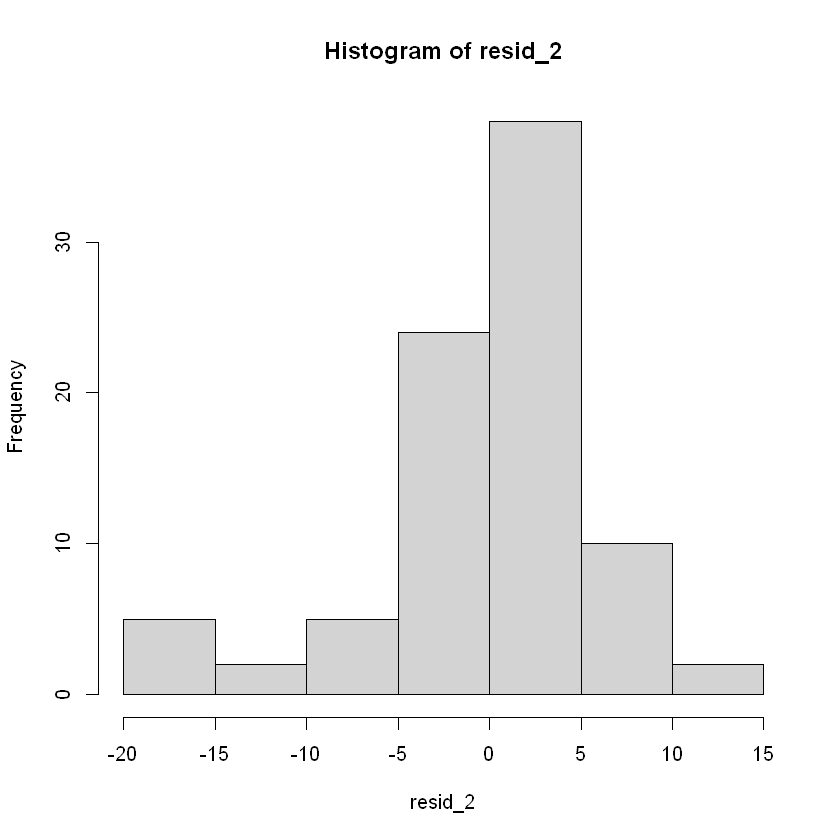

In [107]:
resid_2 <- fit2_2_holt$residuals 
hist(resid_2) #잔차의 히스토그램

In [108]:
t.test(resid_2) #예측오차의 평균은 0 일까?


	One Sample t-test

data:  resid_2
t = -0.58073, df = 85, p-value = 0.563
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -1.7375394  0.9519831
sample estimates:
 mean of x 
-0.3927782 


In [109]:
dwtest(lm(resid_2~1))


	Durbin-Watson test

data:  lm(resid_2 ~ 1)
DW = 2.0697, p-value = 0.6272
alternative hypothesis: true autocorrelation is greater than 0


In [110]:
#저번 과제 6번의 모형과 예측력이 서로 어떠한지 비교
ts_data <- data.frame(
  z = export,
  freq = as.factor(as.integer(cycle(export))),
  #지시함수의 주기(가변수)
  trend = 1:length(export)
)

reg <- lm(z ~ 0 + trend + freq, data = ts_data) #beta0 = 0 이라는 제약조건
sum((reg$residuals) ^ 2) #저번 과제 모형의 SSE

#SSE를 비교하려니 적합값들의 길이가 다르다.
#MSE로 비교해보자

[1] 1371.057

In [111]:
c(mean(resid_2^2), mean(reg$residuals^2))
#MSE 상으로 보았을 때
#각 각 mse는 39.0372 , 15.949
#이중지수평활법을 통한 예측이 더 정확하다고 볼 수 있다.

[1] 39.03725 15.94253

### 3번

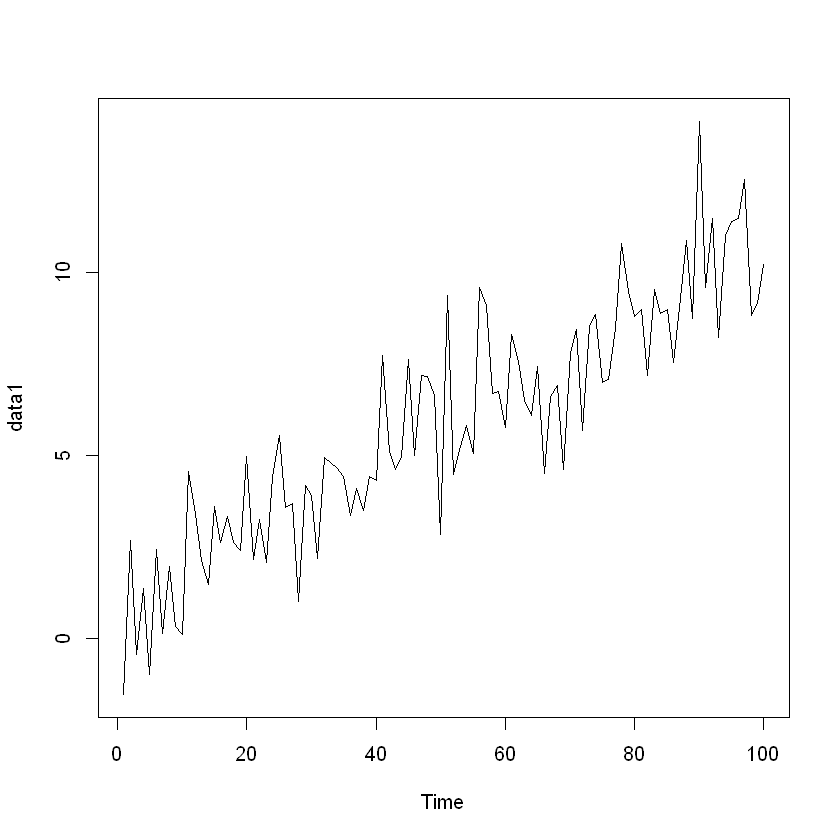

In [112]:
par(mfrow = c(1, 1))
z <- read.csv('data1.csv')
data1 <- ts(z$z)#시계열 데이터로 변환
t <- z$t #시점.
plot(data1) #불규칙 성분과 추세성분이 있다.

In [113]:
tmp.data <- data.frame(
    z = z$z,
    t = z$t)

#### 3-1

(Intercept)           t 
 0.81893207  0.09961891

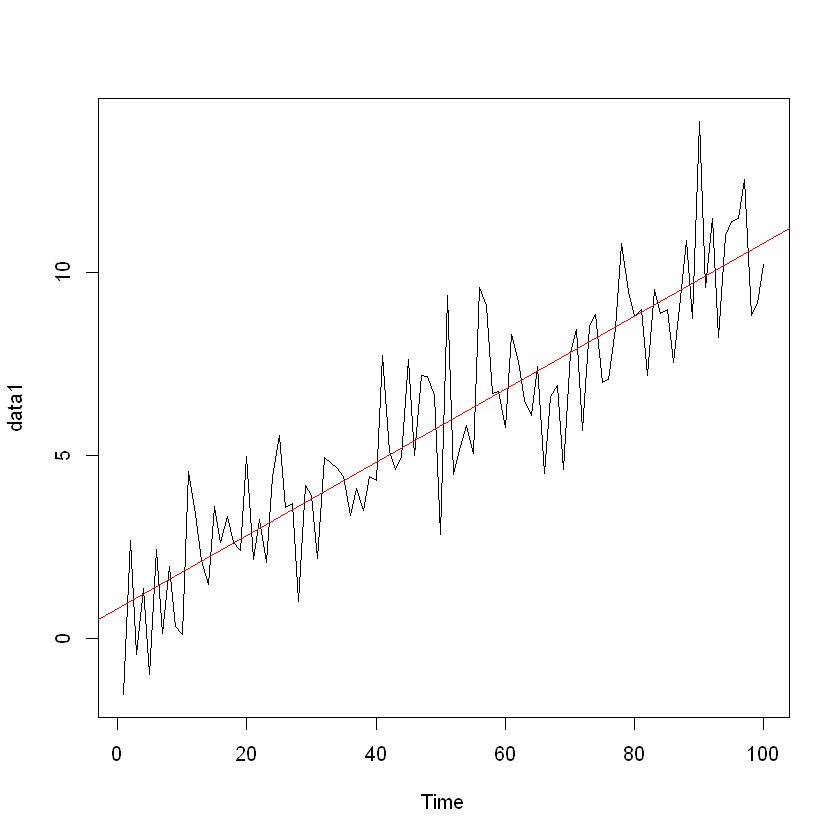

In [114]:
fit3_1 <- lm(data1 ~ t) #추세모형 적합
fit3_1$coefficients

plot(data1) #잘 적합이 되었는지 시각화
abline(fit3_1, col = 'red')

In [115]:
summary(fit3_1)


Call:
lm(formula = data1 ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0803 -1.0287  0.0169  0.8426  4.3288 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.818932   0.296301   2.764  0.00682 ** 
t           0.099619   0.005094  19.557  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.47 on 98 degrees of freedom
Multiple R-squared:  0.796,	Adjusted R-squared:  0.7939 
F-statistic: 382.5 on 1 and 98 DF,  p-value: < 2.2e-16


적합된 추세모형 $\widehat{Z_t} = 0.81893207+ 0.09961891t$ 이다.

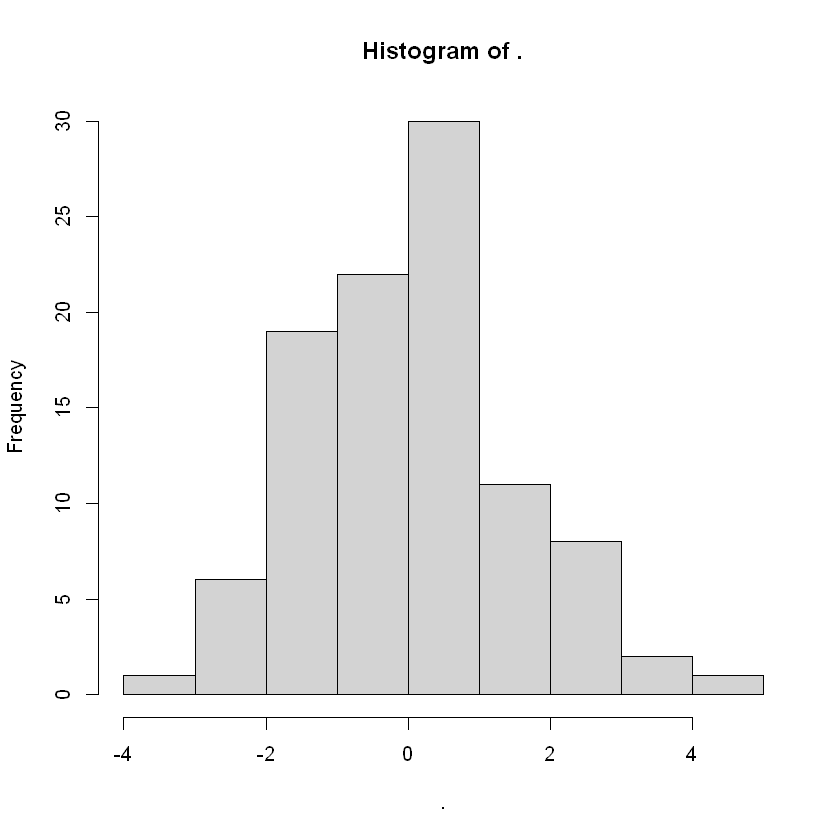

In [116]:
resid3 <- fit3_1$residuals
resid3 %>% hist() #잔차의 히스토그램

In [117]:
t.test(resid3) #잔차 평균은 0인가?


	One Sample t-test

data:  resid3
t = -3.7755e-16, df = 99, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2902834  0.2902834
sample estimates:
    mean of x 
-5.523414e-17 


In [118]:
dwtest(lm(resid3 ~ 1)) #오차들의 자기상관 검정


	Durbin-Watson test

data:  lm(resid3 ~ 1)
DW = 2.2164, p-value = 0.8628
alternative hypothesis: true autocorrelation is greater than 0


In [119]:
shapiro.test(resid3)


	Shapiro-Wilk normality test

data:  resid3
W = 0.98926, p-value = 0.6049


#### 3-2

In [120]:
#위에서 적합한 선형추세모형으로 예측을 시행하자.
prdtn <- predict(fit3_1, newdata =
                   data.frame(t = 100 + (1:10)),
                 interval = 'prediction') %>% data.frame()
prdtn #예측값들은 다음과 같다

,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
1,10.88044,7.903813,13.85707
2,10.98006,8.001681,13.95844
3,11.07968,8.099517,14.05984
4,11.17930,8.197319,14.16128
5,11.27892,8.295088,14.26275
6,11.37854,8.392824,14.36425
7,11.47816,8.490527,14.46578
8,11.57777,8.588197,14.56735
9,11.67739,8.685834,14.66895


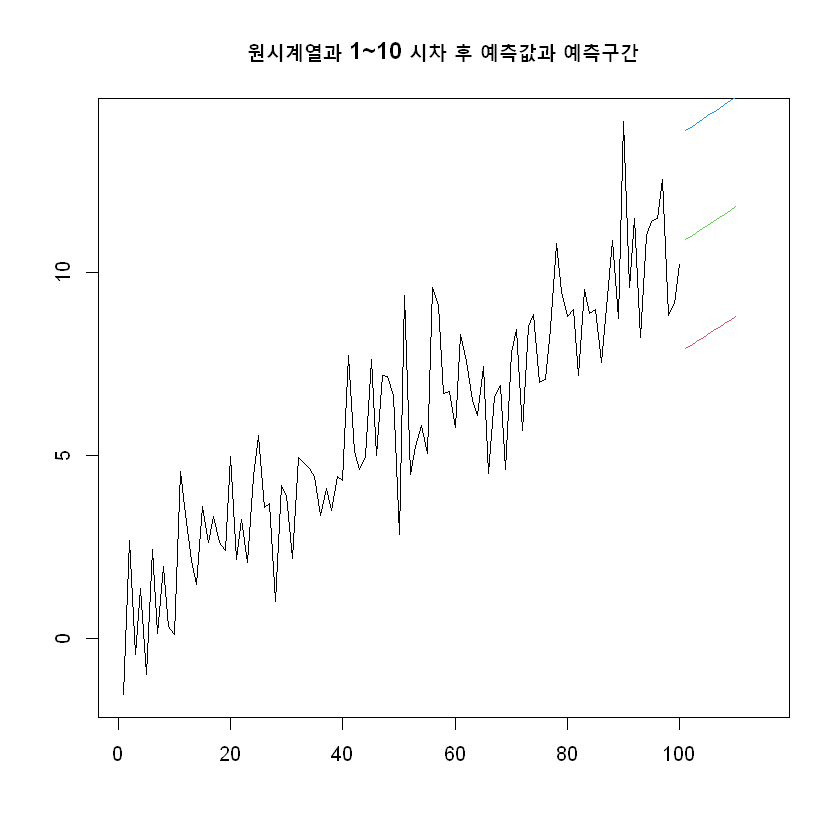

In [121]:
#예측값들과 원시계열 자료 시각화
plot(z~ t, tmp.data,
     type='l',
     main = "원시계열과 1~10 시차 후 예측값과 예측구간",
     xlab= '',ylab='',
     xlim = c(1,115)
     )
lines(101:110, prdtn$lwr , col = 2) #예측구간 하한
lines(101:110, prdtn$fit , col = 3) #예측값
lines(101:110, prdtn$up , col = 4) #예측구간 상한

#### 3-3

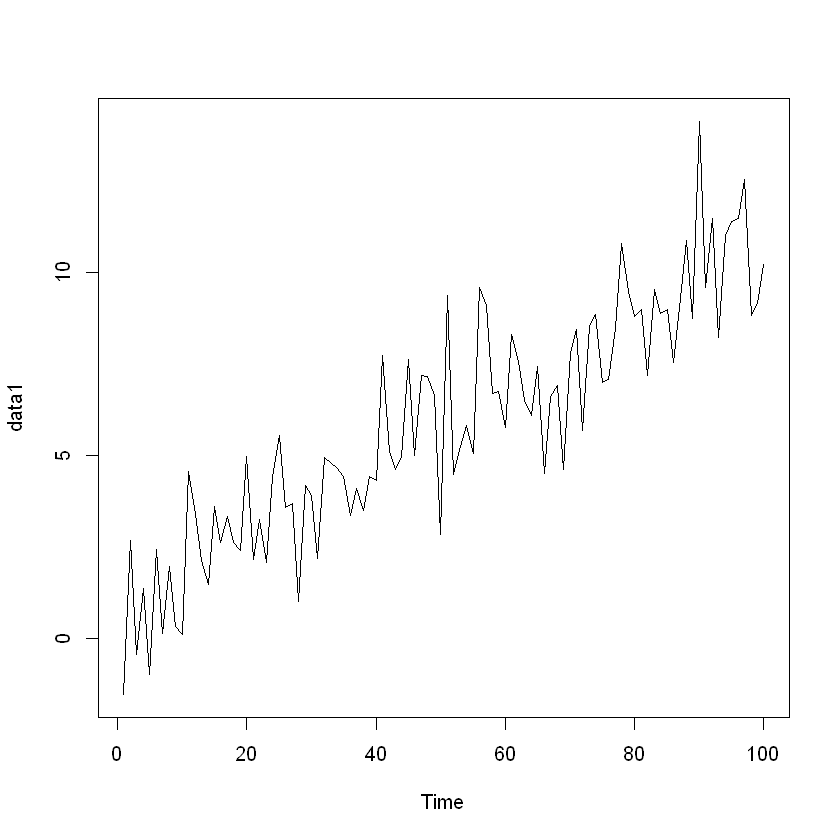

In [122]:
plot(data1) #불규칙 성분과 추세성분이 있다.
#따라서 이중지수평활법을 적용한다. 

In [123]:
#가법 모형
fit3_3_holt <- HoltWinters(data1,
                           gamma = FALSE,
                          seasonal = 'additive')#이중지수평활법 시행

In [124]:
c(fit3_3_holt$alpha,fit3_3_holt$beta)

alpha     beta 
0.496601 0.396225

In [125]:
fit3_3_holt2 <- holt(data1,
                     alpha = fit3_3_holt$alpha,
                     beta = fit3_3_holt$beta,
                     )

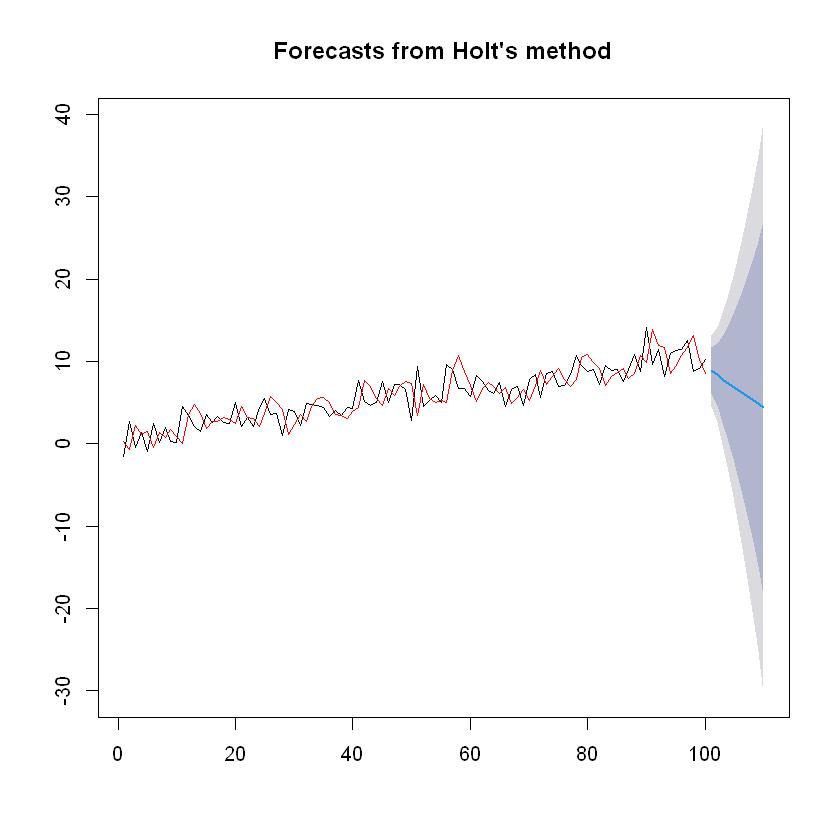

In [126]:
plot(fit3_3_holt2)
lines(fit3_3_holt2$fitted,col = 'red')

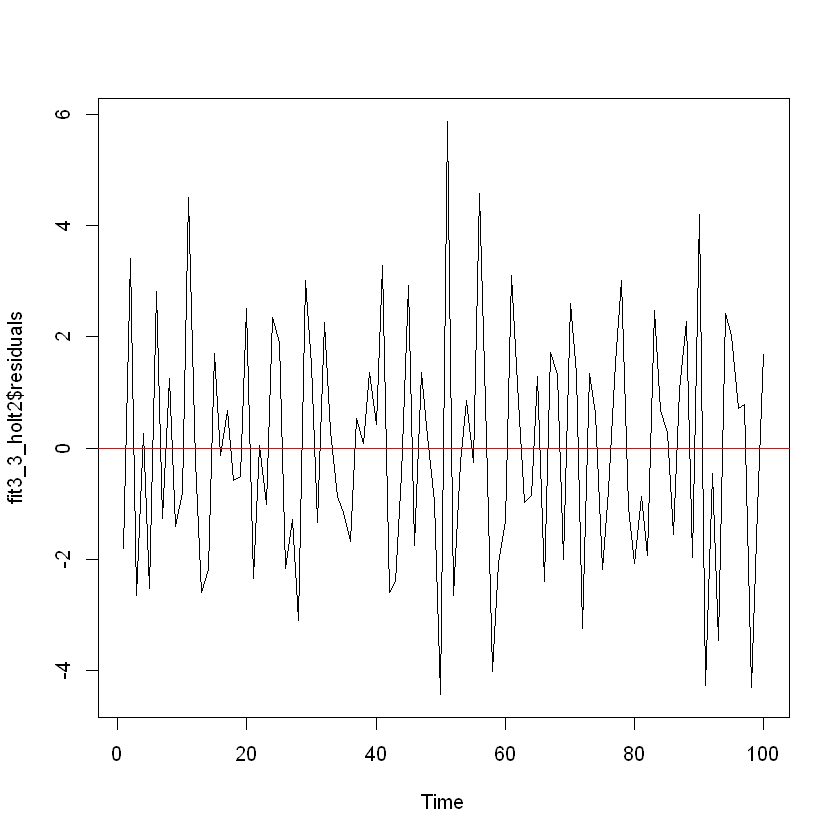

In [127]:
#잔차그림
plot(fit3_3_holt2$residuals)
abline(h=0,col = 'red')

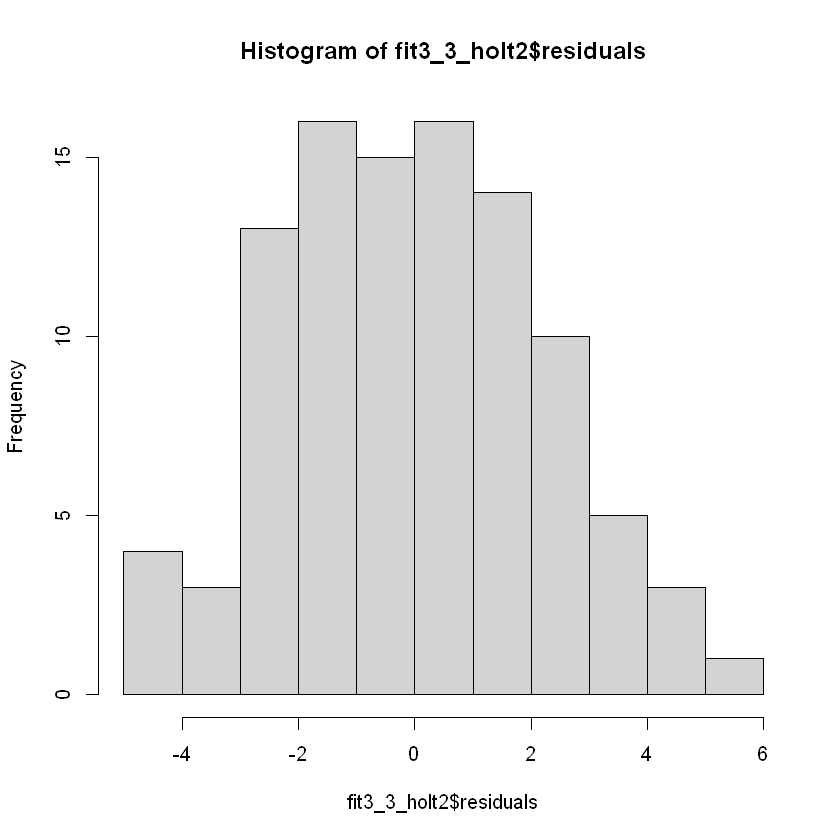

In [128]:
#잔차분석
hist(fit3_3_holt2$residuals)

완벽한 대칭은 아니지만 원점을 기준으로 비슷하게 잔차들이 흩어져있다.

In [129]:
#잔차의 평균은 0 인가?
t.test(fit3_3_holt2$residuals)
#p-value = 0.8962 이므로 잔차의 평균은 0이라 볼 수 있다.


	One Sample t-test

data:  fit3_3_holt2$residuals
t = -0.13075, df = 99, p-value = 0.8962
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4566750  0.4002095
sample estimates:
  mean of x 
-0.02823276 


In [130]:
#잔차들을 서로 무상관인가?
dwtest(lm(fit3_3_holt2$residuals ~ 1), alternative = 'two.sided')


	Durbin-Watson test

data:  lm(fit3_3_holt2$residuals ~ 1)
DW = 2.5174, p-value = 0.008974
alternative hypothesis: true autocorrelation is not 0


p-value = 0.008974  이며 dw 값이 4에 가까우므로 음의 자기상관관계가 있음을 알 수 있다.

#### 3-4

 [1] 8.862685 8.360702 7.858719 7.356735 6.854752 6.352769 5.850786 5.348803
 [9] 4.846819 4.344836


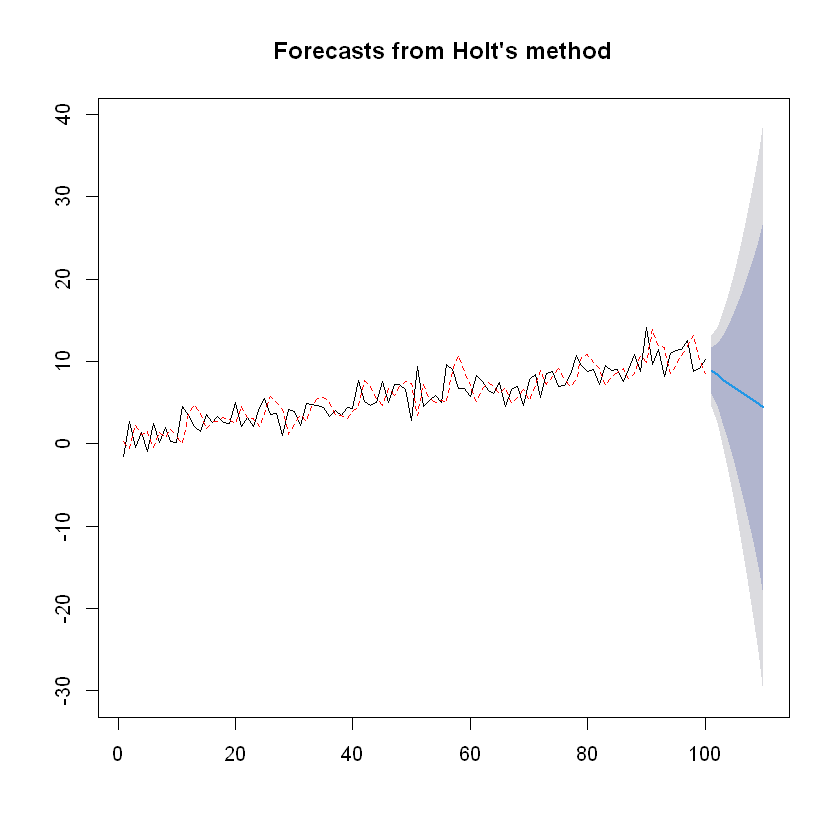

In [131]:
holt_prdct <- fit3_3_holt2 %>%
  data.frame() #예측값, 구간 데이터 프레임에 삽입
print(holt_prdct$Point.Forecast) #마지막 시점으로부터 10개의 예측값 관찰

plot(
  fit3_3_holt2,
  ylab = "",
  xlab = "",
  lty = 1,
  col = "black"
)
lines(fitted(fit3_3_holt2), col = "red", lty = 2)

#### 3-5

In [132]:
z_ <- read.csv('data1_new.csv')
data1_new <- ts(z_$z) #실제값.
SSE_holt <-
  sum((data1_new - holt_prdct$Point.Forecast)^2) #이중평활지수 모형의 잔차
SSE_trend <- sum((data1_new - prdtn$fit)^2) #선형추세모형의 잔차

c(SSE_holt , SSE_trend) #선형추세 모형의 오차제곱합이 더 작으므로 더 적합한 모형이다.

[1] 398.96765  39.19789

### 4번

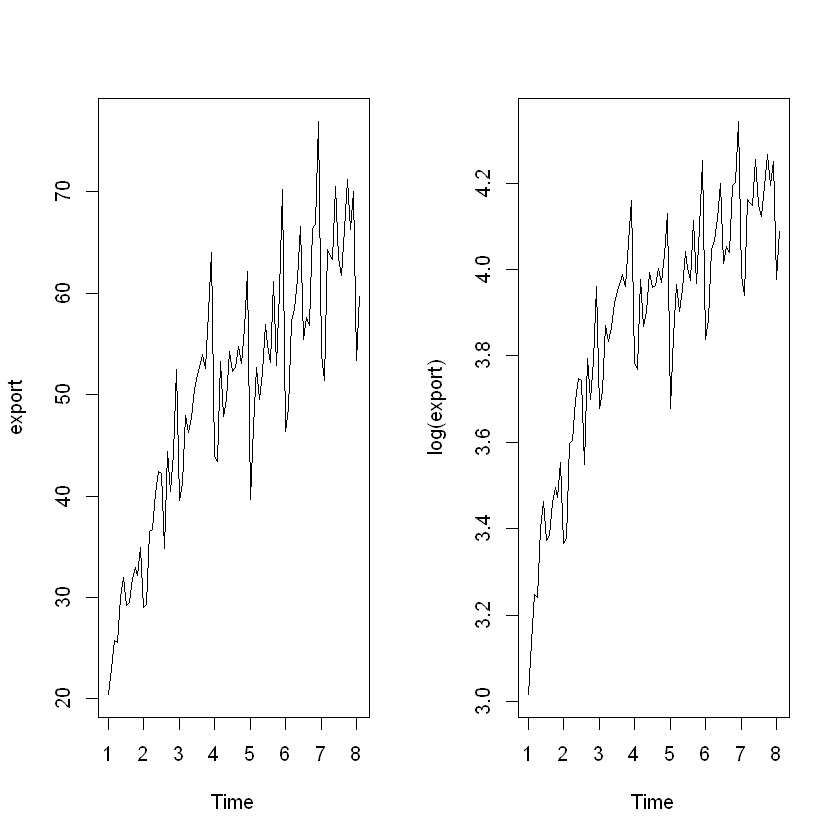

In [133]:
z4 <- scan('export.txt')
export <- ts(z4, frequency = 12)
par(mfrow= c(1,2))
ts.plot(export) # 불규칙성분 , 추세성분과 계설성분까지 모두 있는 시계열자료
ts.plot(log(export)) #이분산성이 있는지, 없는지 애매모호하다.. 따라서 가법모형과 승법모형을 둘 다 적용하고 SSE를 비교하여 우수한 모델에 대해 잔차분석을 해보자.
#하지만 직선형 추세는 아니고 약간 곡선형 추세를 갖는다.
t <- 1:length(z4)
par(mfrow= c(1,1))

#### 4-1-1 가법모형

In [134]:
fit_trend <- lm(export ~ t + I(t ^ 2)) #이차항을 추가
summary(fit_trend)
#회귀계수의 추정치 : beta0 = 24.382314 beta1 = 0.870551 , beta2 = -0.004889
Tt_hat <- fit_trend$fitted.values # 적합된 추세모형의 fitted values


Call:
lm(formula = export ~ t + I(t^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6907  -3.3962   0.0991   3.2700  15.2529 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.382314   1.898857  12.841  < 2e-16 ***
t            0.870551   0.100738   8.642 3.40e-13 ***
I(t^2)      -0.004889   0.001122  -4.358 3.74e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.734 on 83 degrees of freedom
Multiple R-squared:  0.8031,	Adjusted R-squared:  0.7983 
F-statistic: 169.3 on 2 and 83 DF,  p-value: < 2.2e-16


적합된 추세성분은  $\widehat{T_t} = 24.382314+ 0.870551 -0.004889{t^2}$ 이다.

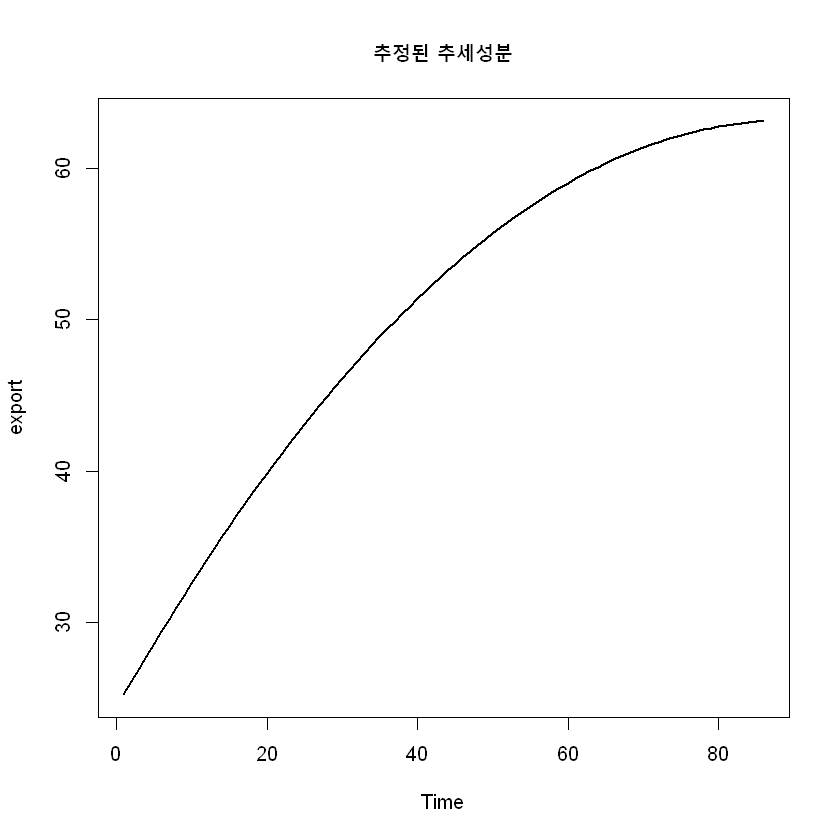

In [135]:
ts.plot(
  Tt_hat,
  col = 1:2,
  lty = 1:2,
  lwd = 2:3,
  ylab = 'export',
  main = '추정된 추세성분'
)
#적합된 추세

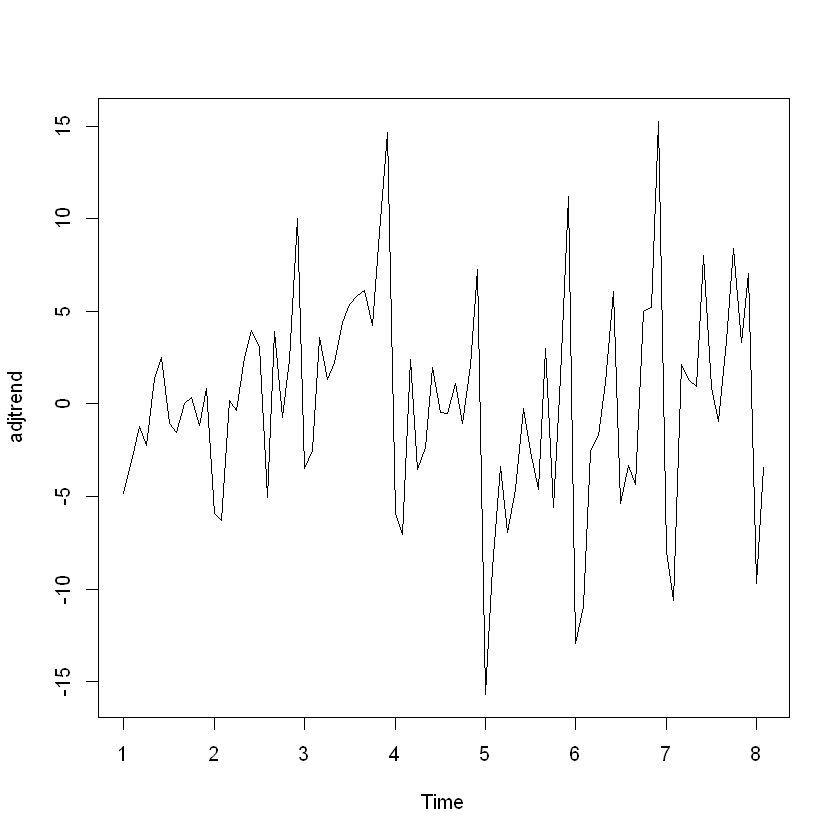

In [136]:
#계절 성분과 불규칙 성분만 남기자(추세 성분 조정)
adjtrend <- export - Tt_hat
plot.ts(adjtrend) #계절 성분과 불규칙 성분만 남았다.

In [137]:
ind <- factor(cycle(adjtrend)) #가변수 생성
fit_season <- lm(adjtrend ~ 0 + ind) #beta0 = 0 이라는 제약조건
summary(fit_season)
fit_season$coefficients #각 계수들은 각 월별 자료에 대한 평균이다.


Call:
lm(formula = adjtrend ~ 0 + ind)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6323 -2.2486  0.1244  2.3284  7.3203 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
ind1   -8.3000     1.2689  -6.541 6.96e-09 ***
ind2   -6.5902     1.2689  -5.194 1.75e-06 ***
ind3    0.1671     1.3565   0.123  0.90229    
ind4   -1.7258     1.3565  -1.272  0.20729    
ind5    0.1683     1.3565   0.124  0.90162    
ind6    3.8035     1.3565   2.804  0.00645 ** 
ind7   -0.0172     1.3565  -0.013  0.98992    
ind8   -1.4538     1.3565  -1.072  0.28733    
ind9    1.8865     1.3565   1.391  0.16850    
ind10   1.5094     1.3565   1.113  0.26945    
ind11   3.2221     1.3565   2.375  0.02013 *  
ind12   9.4574     1.3565   6.972 1.11e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.589 on 74 degrees of freedom
Multiple R-squared:  0.6507,	Adjusted R-squared:  0.594 
F-statistic: 11.49 on 12 and 74 DF,  p-value: 1.341e-12


ind1        ind2        ind3        ind4        ind5        ind6 
-8.30002381 -6.59022717  0.16711244 -1.72577477  0.16825897  3.80349940 
       ind7        ind8        ind9       ind10       ind11       ind12 
-0.01719635 -1.45382828  1.88646075  1.50938504  3.22208743  9.45742507

적합된 계절 성분은 $\widehat{S_t} = -8.3000{I_1} -6.5902{I_2} ... + 9.4574{I_{12}} $

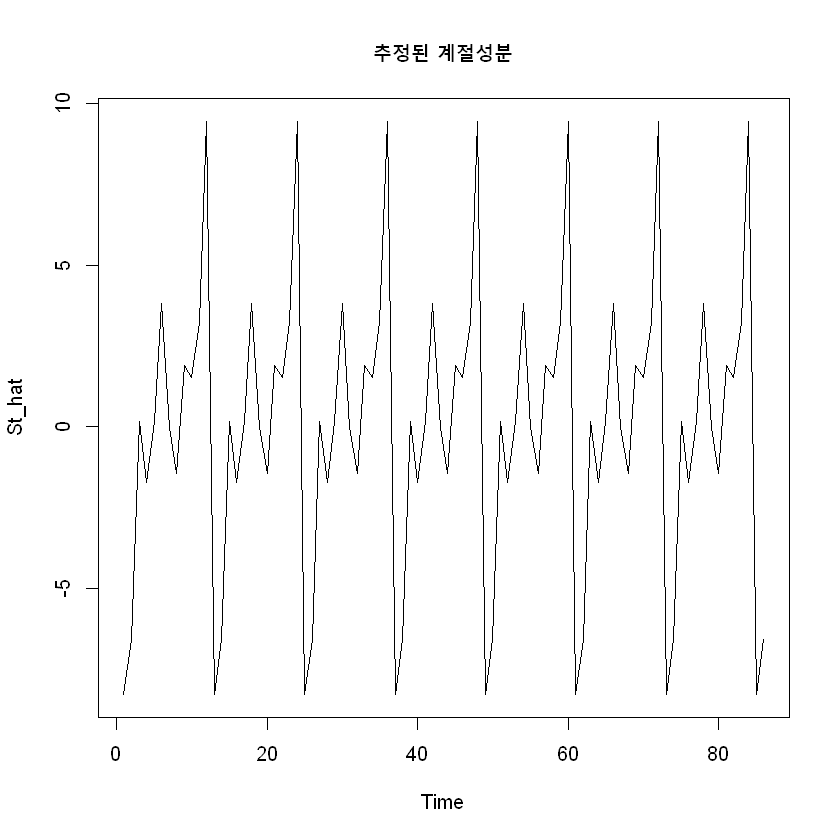

In [138]:
St_hat <- fit_season$fitted.values
plot.ts(St_hat , main = '추정된 계절성분') #주기성이 한 눈에 들어온다.

$\widehat{I_t} = export - \widehat{T_t} - \widehat{S_t}$

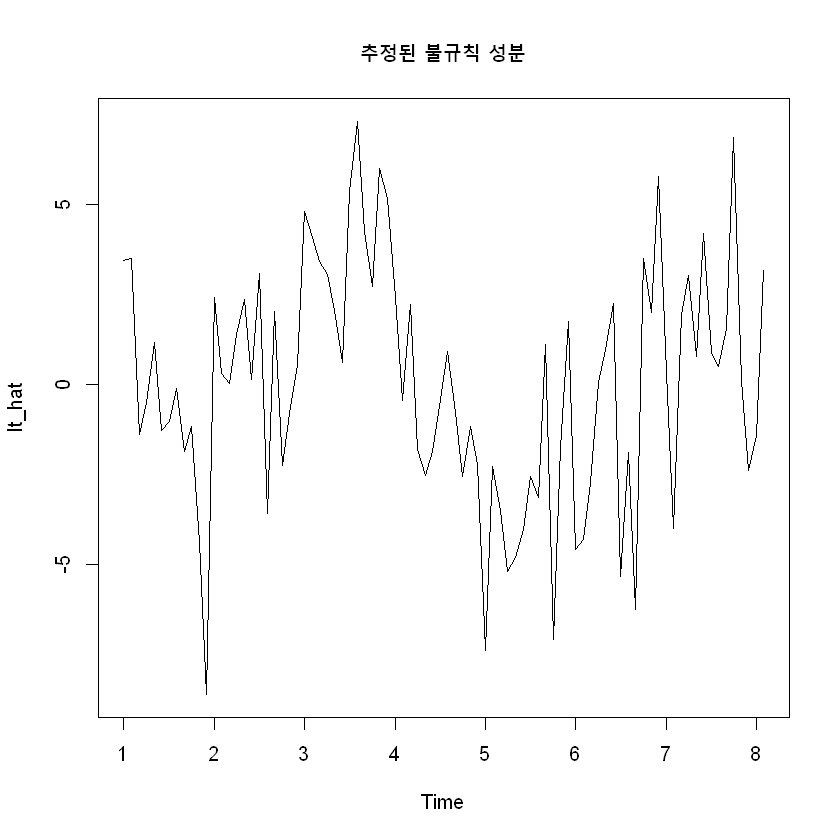

In [139]:
#불규칙성분에 대해서 추정하여보자
It_hat <- export - Tt_hat - St_hat
ts.plot(It_hat , main = '추정된 불규칙 성분')

#각 성분의 분해가 모두 끝났다.

#### 4-1-2 승법 모형

In [140]:
#추세모형을 적합하는 것은 가법과 같으므로 같은 모델을 사용한다.
fit_trend %>% summary()


Call:
lm(formula = export ~ t + I(t^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6907  -3.3962   0.0991   3.2700  15.2529 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.382314   1.898857  12.841  < 2e-16 ***
t            0.870551   0.100738   8.642 3.40e-13 ***
I(t^2)      -0.004889   0.001122  -4.358 3.74e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.734 on 83 degrees of freedom
Multiple R-squared:  0.8031,	Adjusted R-squared:  0.7983 
F-statistic: 169.3 on 2 and 83 DF,  p-value: < 2.2e-16


$\widehat{T_t} = 24.382314+ 0.870551 -0.004889{t^2}$ 로 적합

계절성분 추정 $Z_t/\widehat{T_t} = \delta_1I_1 + \delta_2I_2 + ... + \delta_12I_12 $

In [141]:
adjtrend_mul <- export/Tt_hat #원 시계열에서 2차 추세성분 조정.
adjtrend_mul %>% head()
trend_mul <- fitted(fit_trend) #추세의 적합값.

,Jan,Feb,Mar,Apr,May,Jun
1,0.8079856,0.8814788,0.9547322,0.9195181,1.0470822,1.0853013


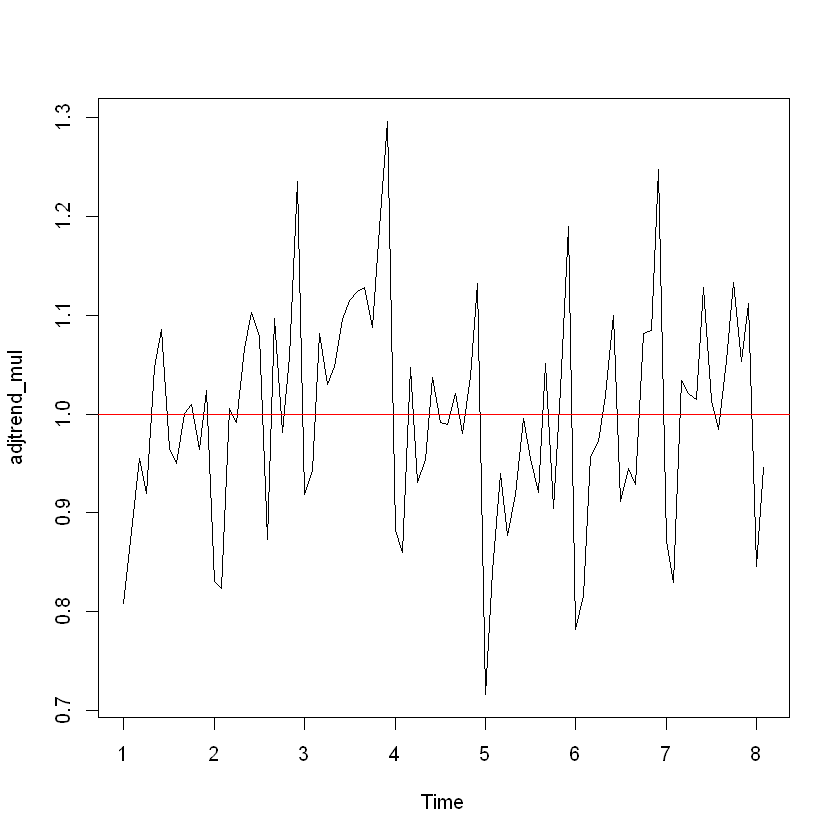

In [142]:
plot.ts(adjtrend_mul) #불규칙 성분과 계절성분만 남게 되었음.
abline(h=1,col = 'red')

In [143]:
#지시함수를 이용하여 계절성분 추정
y = factor(cycle(adjtrend_mul)) #가변수화

fit_season_mul <- lm(adjtrend_mul ~ 0 + y) #회귀계수의 절편 = 0 이라는 제약조건
summary(fit_season_mul) #회귀계수와 모형 적합도 확인


Call:
lm(formula = adjtrend_mul ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.152476 -0.044123  0.003785  0.043146  0.154544 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1   0.83196    0.02342   35.52   <2e-16 ***
y2   0.86755    0.02342   37.05   <2e-16 ***
y3   1.00281    0.02504   40.05   <2e-16 ***
y4   0.96308    0.02504   38.47   <2e-16 ***
y5   1.00993    0.02504   40.34   <2e-16 ***
y6   1.07778    0.02504   43.05   <2e-16 ***
y7   1.00444    0.02504   40.12   <2e-16 ***
y8   0.96966    0.02504   38.73   <2e-16 ***
y9   1.04004    0.02504   41.54   <2e-16 ***
y10  1.02563    0.02504   40.97   <2e-16 ***
y11  1.05885    0.02504   42.29   <2e-16 ***
y12  1.17665    0.02504   47.00   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06624 on 74 degrees of freedom
Multiple R-squared:  0.9963,	Adjusted R-squared:  0.9957 
F-statistic:  1643 on 12 and 74 DF,  p-value: < 2.2e-16


모형도 적합하고 개별 회귀계수도 모두 유의한 것을 확인할 수 있다.

$\widehat{S_t} = 0.83196I_1 + 0.86755I_2 + ... + 1.17665I_{12}$  와 같이 적합된 것을 확인할 수 있다.

또한 개별 회귀계수는 월별 평균값이라고 해석할 수 있다.

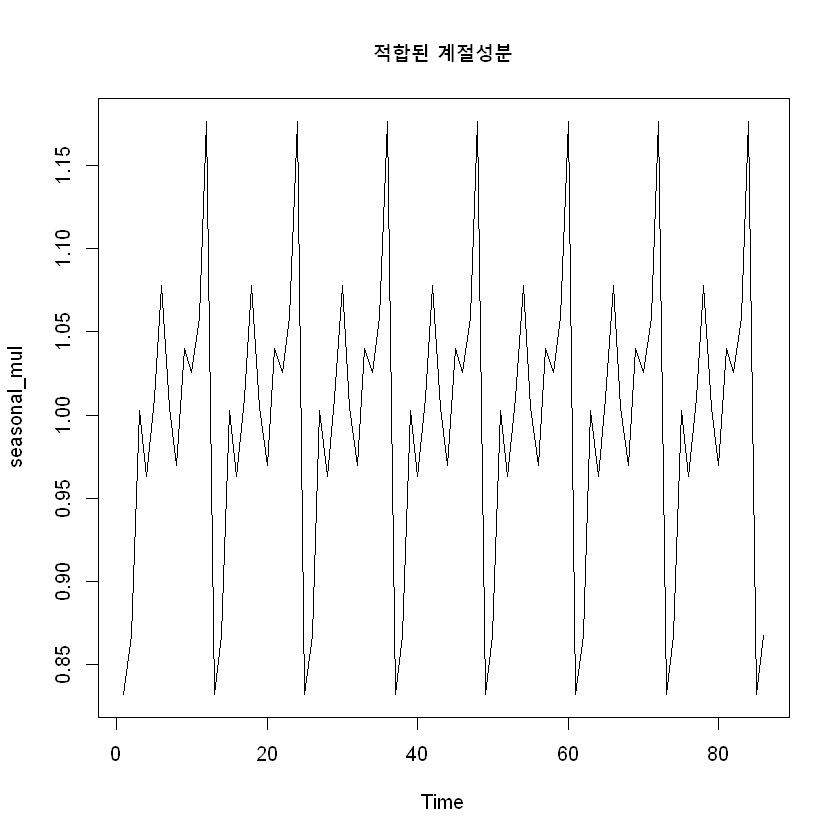

In [144]:
seasonal_mul <- fitted(fit_season_mul) #적합된 계절 성분.
ts.plot(seasonal_mul , main = '적합된 계절성분')

불규칙 성분 $\widehat{I_t} = Z_t/(\widehat{T_t} \times \widehat{S_t})$

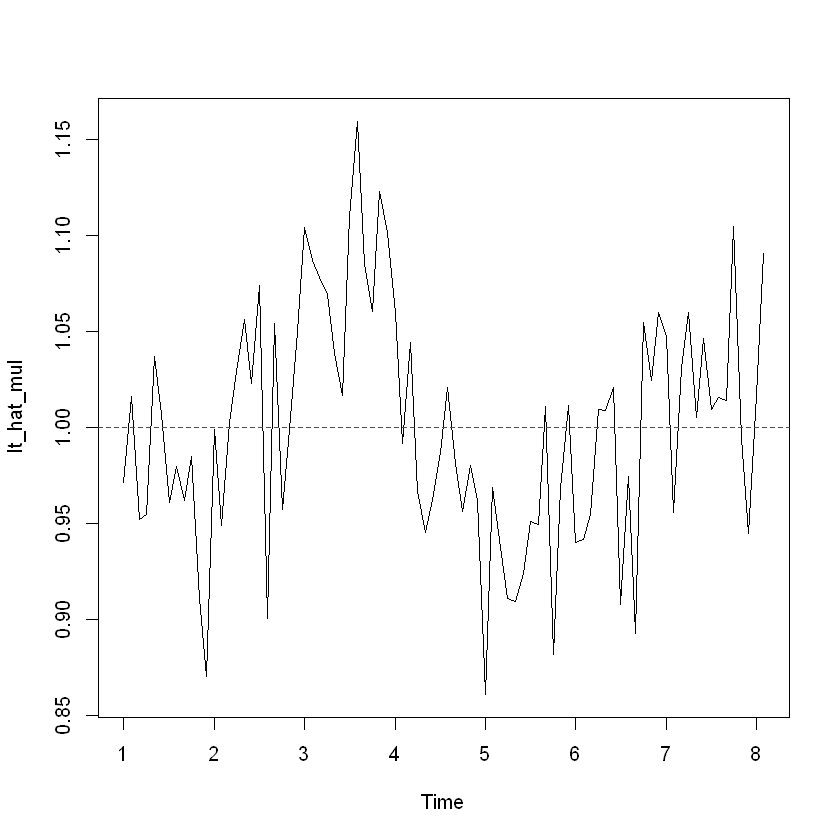

In [145]:
It_hat_mul <- export/trend_mul/seasonal_mul
ts.plot(It_hat_mul) #불규칙 성분
abline(h=1,lty =2,col = 'red')

In [146]:
# 가법모형과 승법모형 비교.
pred_a <- Tt_hat + St_hat
pred_m <- trend_mul * seasonal_mul

In [147]:
c(mean((export - pred_a)^2) , mean((export - pred_m)^2)) #승법 모형의 MSE가 더 낮다. 
#예측력이 더 좋은 모형이므로 승법 모형으로 잔차분석 시행

[1] 11.08395  9.71452

#### 4-2

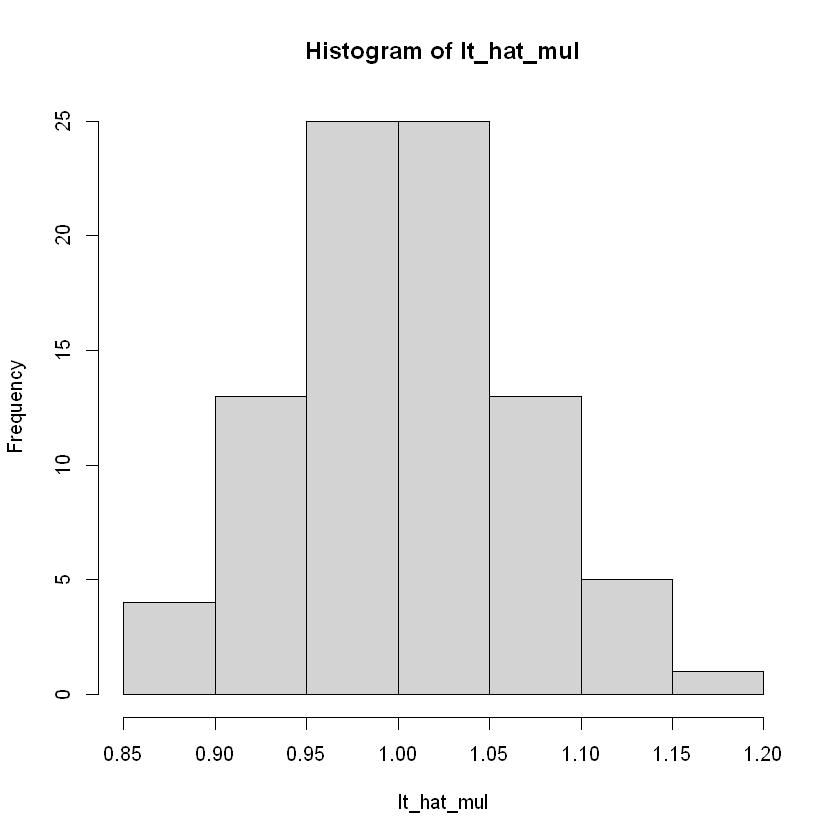

In [148]:
hist(It_hat_mul)

0의 근처에 값이 몰려있긴 하지만 왼쪽으로 꼬리가 길다.

In [149]:
#추정된 불규칙 성분(잔차)의 평균이 0인가?
t.test(It_hat_mul-1) #p-value = 1 평균이 0이라고 할 수 있다.


	One Sample t-test

data:  It_hat_mul - 1
t = -1.1638e-15, df = 85, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.01322573  0.01322573
sample estimates:
    mean of x 
-7.741724e-18 


In [150]:
#추정된 불규칙 성분(잔차)는 서로 무상관인가?
dwtest(lm(It_hat_mul ~ 1), alternative = 'two.sided')
#양측검정을 하였을 때 DW-value가 0에 가까우며 p-값은 1.727e-06
#즉 불규칙 성분(잔차)가 양의 상관관계를 갖는다고 보아야 한다.
#아직 불규치기 성분엔 예측에 대한 정보가 남아있다.


	Durbin-Watson test

data:  lm(It_hat_mul ~ 1)
DW = 1.0361, p-value = 1.727e-06
alternative hypothesis: true autocorrelation is not 0


#### 4-3-1 가법분해

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,20.40,23.01,25.73,25.55,29.96,31.94,29.18,29.48,31.83,32.93,32.18,34.95
2,28.98,29.32,36.53,36.73,40.29,42.41,42.24,34.79,44.41,40.42,44.24,52.45
3,39.59,41.21,47.92,46.26,47.73,50.52,52.03,53.10,53.93,52.56,58.10,64.01
4,44.01,43.37,53.30,47.84,49.50,54.27,52.33,52.68,54.75,53.04,56.55,62.14
5,39.61,46.80,52.71,49.50,52.15,56.89,54.90,53.21,61.12,52.85,60.20,70.23
6,46.39,48.65,57.26,58.39,61.46,66.60,55.40,57.63,56.80,66.37,66.77,76.97
7,53.92,51.44,64.29,63.61,63.37,70.53,63.52,61.77,66.25,71.26,66.29,70.07
8,53.34,59.68,,,,,,,,,,


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,NA,NA,NA,NA,NA,NA,29.28583,29.90625,30.61917,31.53500,32.43125,33.29792
2,34.27833,35.04375,35.78917,36.62542,37.44000,38.67167,39.84292,40.78042,41.75042,42.62208,43.32917,43.97708
3,44.72292,45.89375,47.05333,47.95583,49.03917,50.09833,50.76417,51.03833,51.35250,51.64250,51.78208,52.01208
4,52.18083,52.17583,52.19250,52.24667,52.20208,52.05958,51.79833,51.75792,51.87625,51.92083,52.10042,52.32000
5,52.53625,52.66542,52.95292,53.21042,53.35458,53.84375,54.46333,54.82292,55.08958,55.64958,56.40792,57.20042
6,57.62583,57.83083,57.83500,58.21833,59.05542,59.61000,60.20458,60.63458,61.04375,61.55417,61.85125,62.09458
7,62.59667,63.10750,63.67375,64.27125,64.45500,64.14750,63.83583,64.15500,NA,NA,NA,NA
8,NA,NA,,,,,,,,,,


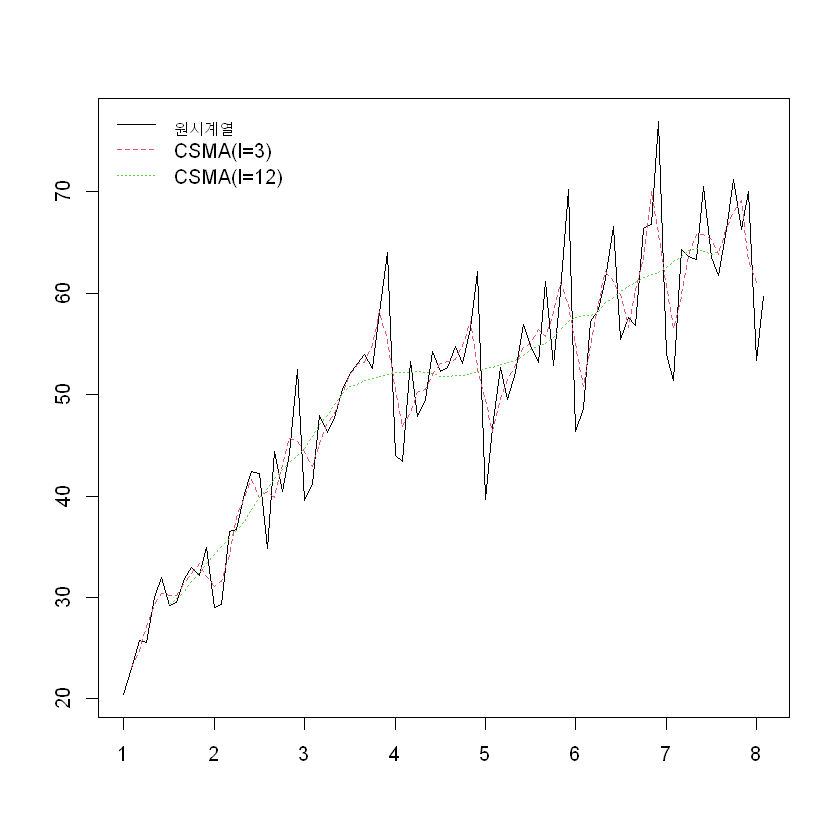

In [151]:
export
ma(export, order = 12) #centre는 TRUE가 디폴트
#window를 주기와 같게하여 추세만 남김

#시도표와 이동평균법으로 평활된 값들을 그려보자
plot.ts(export , ylab = '', xlab = '')
lines(ma(export, order = 3) , col = 2, lty = 2) #계절 성분이 남아있다
lines(ma(export, order = 12, centre = TRUE),
      col = 3 ,
      lty = 3) #추세만 남는다
legend(
  'topleft',
  lty = 1:3,
  col = 1:3,
  c('원시계열', "CSMA(l=3)", "CSMA(l=12)"),
  bty = 'n'
)

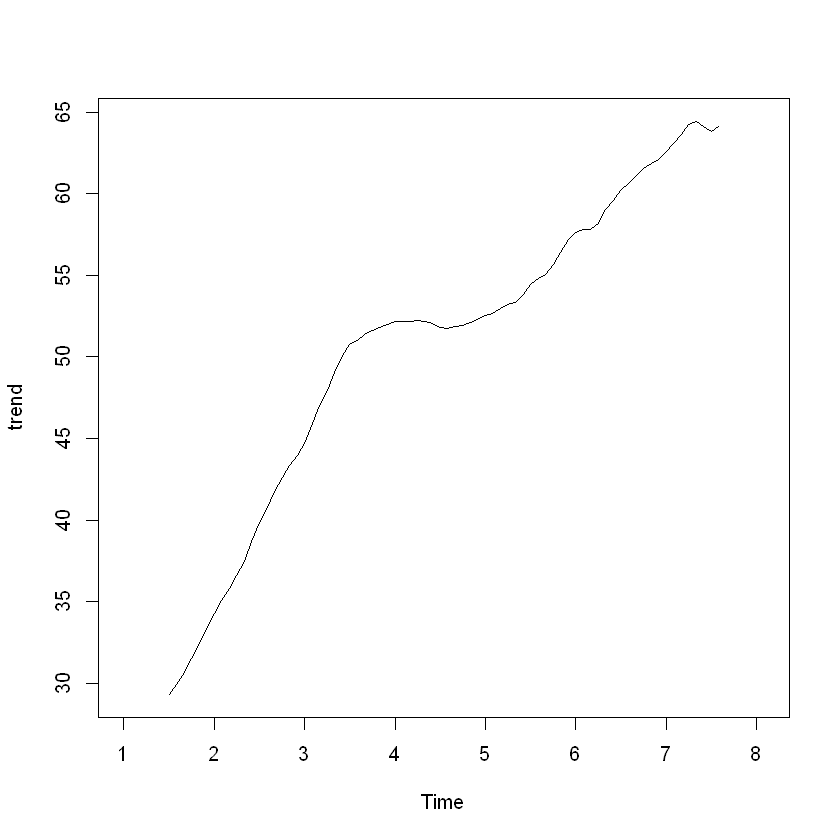

In [152]:
#1 추세성분
trend = ma(export , 12)
plot.ts(trend) #추세만 남음

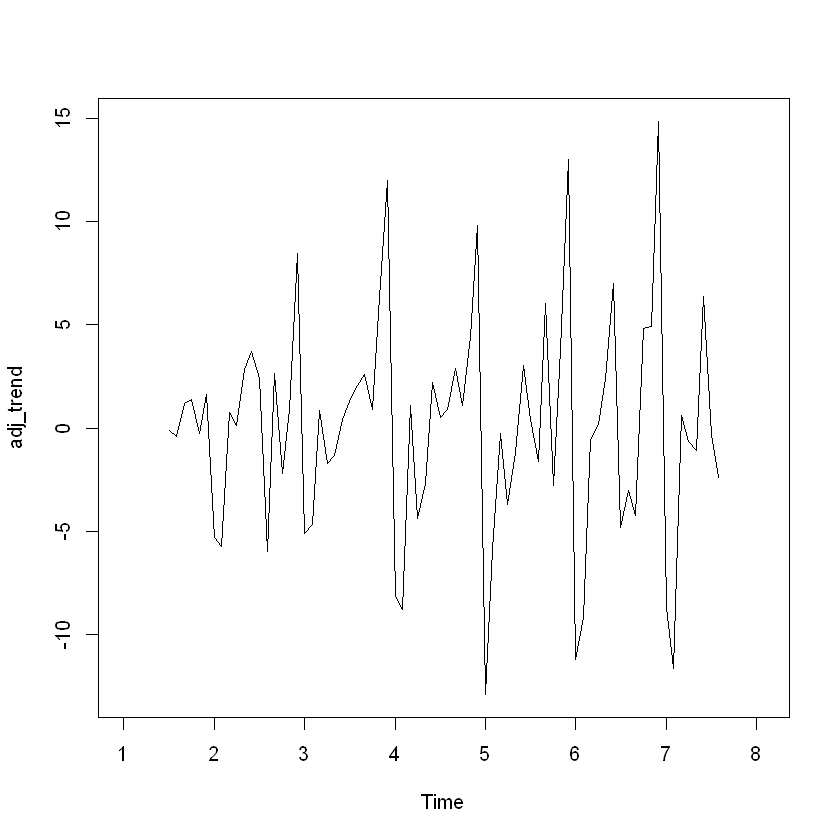

In [153]:
#2 계절성분
adj_trend = export - trend
plot.ts(adj_trend) #계절성분과 불규칙성분이 남게 되었다.

In [154]:
#계절별 평균을 구하자
fit44 <- lm(adj_trend ~ 0 + as.factor(cycle(adj_trend)))
fit44$coefficients #각 계절별 자료의 평균이 나왔다.

as.factor(cycle(adj_trend))1  as.factor(cycle(adj_trend))2 
                   -8.5734722                    -7.6545139 
 as.factor(cycle(adj_trend))3  as.factor(cycle(adj_trend))4 
                    0.4188889                    -1.6996528 
 as.factor(cycle(adj_trend))5  as.factor(cycle(adj_trend))6 
                   -0.1743750                     3.7981944 
 as.factor(cycle(adj_trend))7  as.factor(cycle(adj_trend))8 
                   -0.0850000                    -1.4907738 
 as.factor(cycle(adj_trend))9 as.factor(cycle(adj_trend))10 
                    1.8513889                     0.5409722 
as.factor(cycle(adj_trend))11 as.factor(cycle(adj_trend))12 
                    3.3563194                     9.9746528

[1] 0.02188575

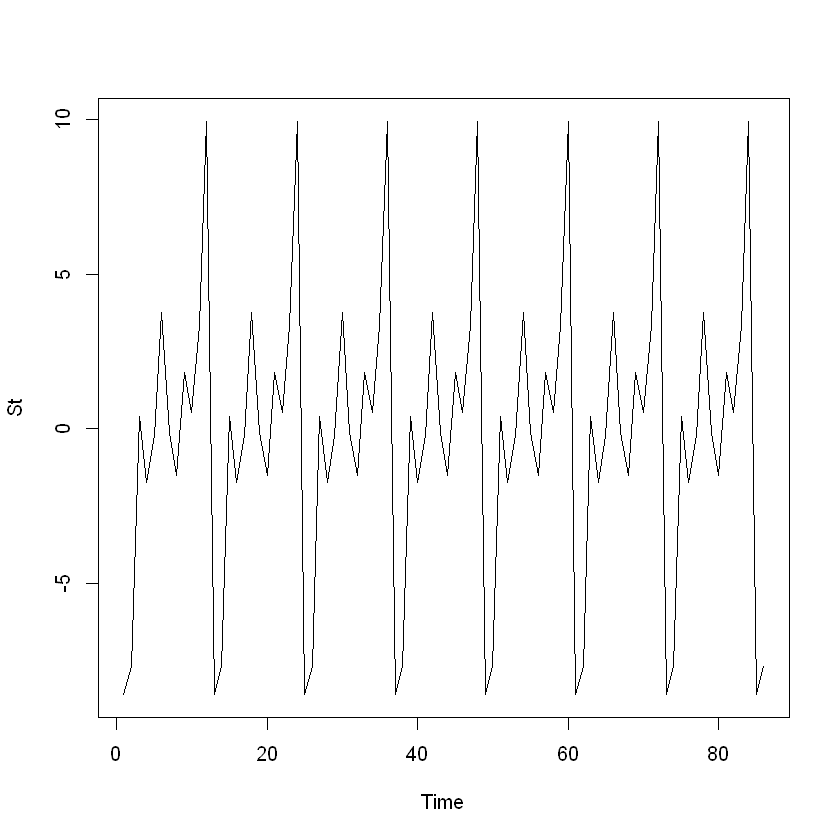

In [155]:
season_coef <- fit44$coefficients %>% as.vector() #벡터에 저장
mean(season_coef)

seasonal = season_coef - mean(season_coef)
#export는 7년치 자료에 8월치 몇개가 들어간 정보이다.

St = rep(seasonal , 8) #8년치를 해두고 10개의 값을 버리면 될 것 같다.

n = length(export)
St <- St[1:86] #마지막 10개의 값을 버림.

plot.ts(St)

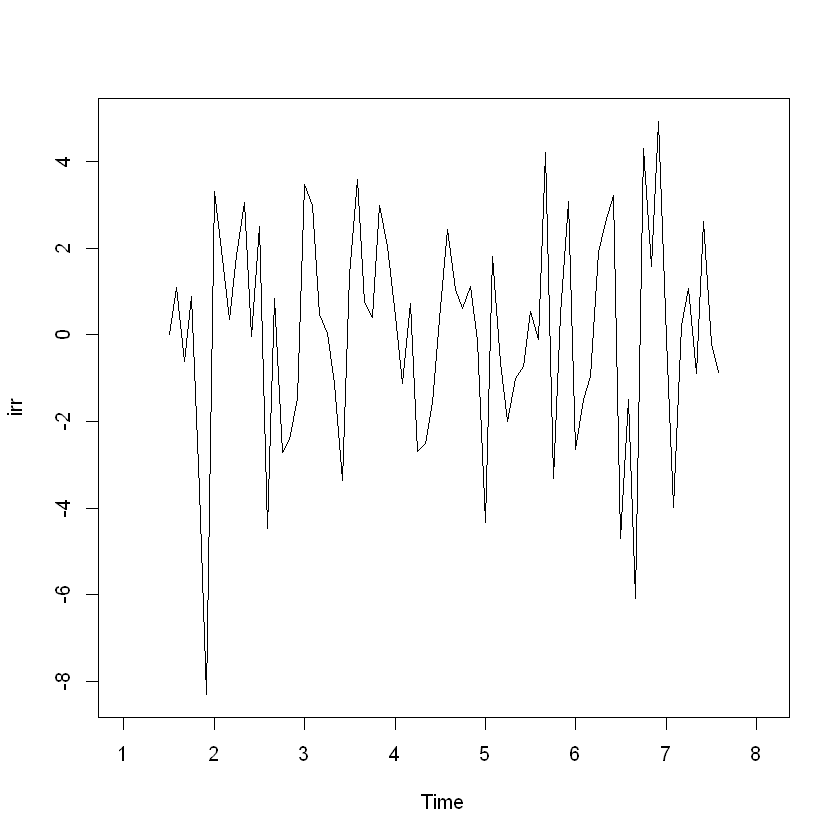

In [156]:
#3.불규칙 성분
irr <- export - trend - St
plot.ts(irr)

#이동평균법을 통해 모든 성분의 분해가 끝났다.

In [157]:
irr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,NA,NA,NA,NA,NA,NA,0.001052414,1.086409557,-0.618669808,0.875913525,-3.585683697,-8.300683697
2,3.297024636,1.952649636,0.343830192,1.826121858,3.046260747,-0.037975364,2.503969081,-4.477757110,0.830080192,-2.721169808,-2.423600364,-1.479850364
3,3.462441303,2.992649636,0.469663525,0.025705192,-1.112905919,-3.354642030,1.372719081,3.574326224,0.747996858,0.398413525,2.983482970,2.045149636
4,0.424524636,-1.129433697,0.710496858,-2.685128142,-2.505822586,-1.565892030,0.638552414,2.434742890,1.044246858,0.600080192,1.115149636,-0.132767030
5,-4.330892030,1.810982970,-0.639919808,-1.988878142,-1.008322586,-0.730058697,0.543552414,-0.100257110,4.200913525,-3.318669808,0.457649636,3.076816303
6,-2.640475364,-1.504433697,-0.972003142,1.893205192,2.600844081,3.213691303,-4.697697586,-1.491923776,-6.073253142,4.296746858,1.584316303,4.922649636
7,-0.081308697,-3.991100364,0.219246858,1.060288525,-0.888739253,2.606191303,-0.208947586,-0.872340443,NA,NA,NA,NA
8,NA,NA,,,,,,,,,,


#### 4-3-2 승법 분해

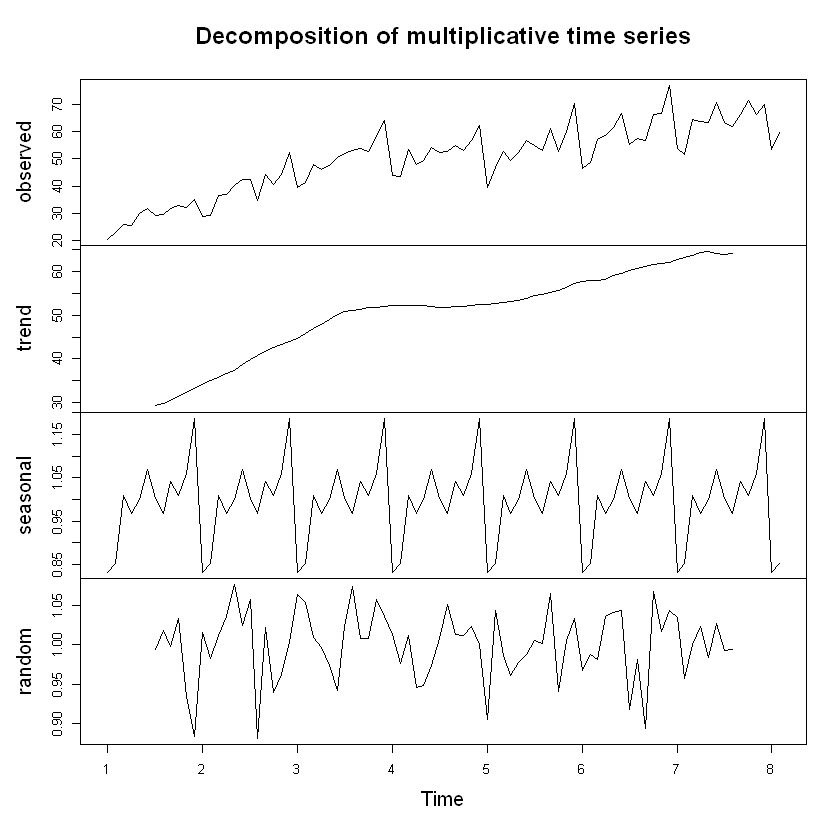

In [158]:
dec_fit_mul <- decompose(export , 'multiplicative')
plot(dec_fit_mul) # 한번에 분해된 성분이 모두 시각화

In [159]:
#가법과 승법 비교
dec_fit_add <- decompose(export , 'additive') #위에서 시행한 이동평균법과 같다.
pred_add <- dec_fit_add$trend + dec_fit_add$seasonal #가법 모형을 이용한 예측값
pred_mul <- dec_fit_mul$trend * dec_fit_mul$seasonal #승법 모형을 이용한 예측값

c(mean((export - pred_add)^2,na.rm = T),mean((export - pred_mul)^2,na.rm = T)) #승법 모형의 예측력이 더 좋다.

[1] 6.383534 4.772651

In [160]:
It_hat4_mul <- export/(dec_fit_mul$trend * dec_fit_mul$seasonal) #이동평균법 승법 모형을 이용한 분해의 불규칙 성분

#### 4-4

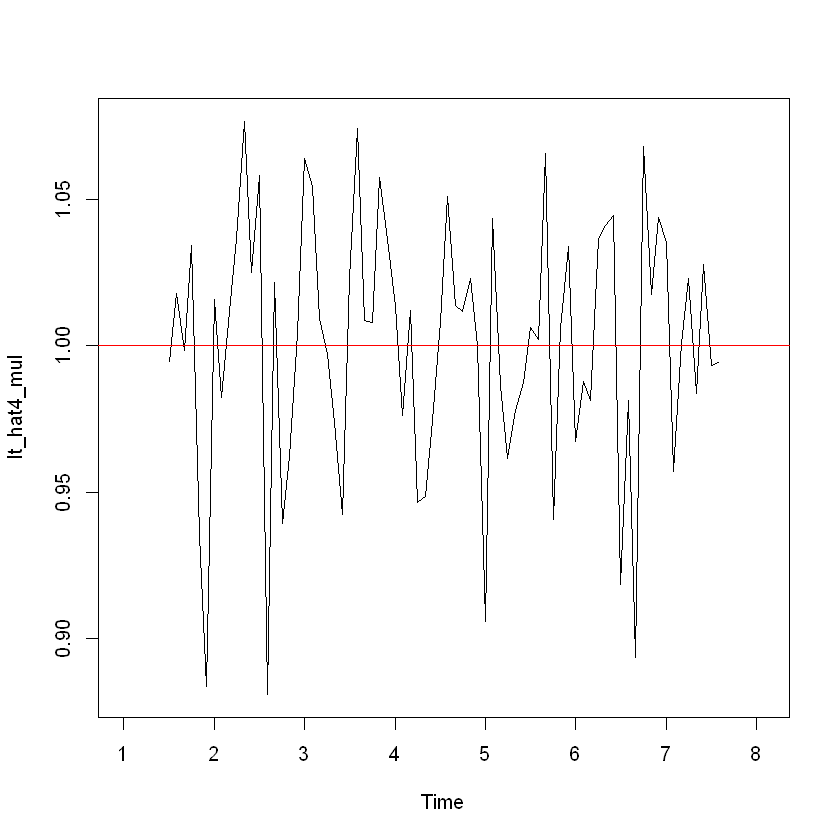

In [161]:
plot.ts(It_hat4_mul) #승법 모형의 예측오차.
abline(h = 1, col = 'red')

#이상점을 제외한다면 어떤 일정한 경계안에 값들이 잘 들어있는 것 같다.
#즉 이분산성은 없어보인다.

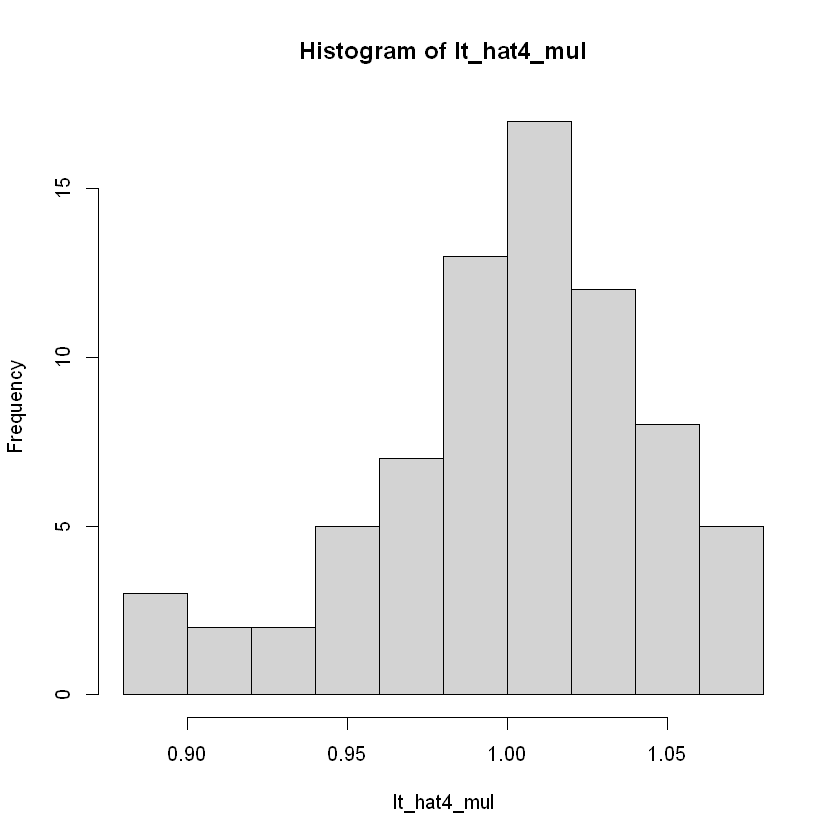

In [162]:
hist(It_hat4_mul)

잔차들은 거의 0 근처에 존재하지만 왼쪽 꼬리가 길게 퍼져있다.

In [163]:
#잔차의 평균은 1인가?
t.test(It_hat4_mul - 1) # p-value = 0.9659 즉 잔차 평균이 1이라고 할 수 있다.


	One Sample t-test

data:  It_hat4_mul - 1
t = 0.042843, df = 73, p-value = 0.9659
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.009994669  0.010433817
sample estimates:
   mean of x 
0.0002195742 


In [164]:
#잔차는 서로 무상관일까?
dwtest(lm(It_hat4_mul ~ 1), alternative = 'two.sided') #p-값이  0.8247
#잔차들은 서로 무상관하다.


	Durbin-Watson test

data:  lm(It_hat4_mul ~ 1)
DW = 1.9487, p-value = 0.8247
alternative hypothesis: true autocorrelation is not 0


#### 4-5

In [165]:
#각 잔차들의 제곱합을 통해 예측력을 비교하자
#근데 적용한 모형의 차이 때문에 잔차들의 개수가 다르다.
#SSE 비교보다는 MSE 비교가 더 적절한 비교 측도.
c( mean(reg$residuals^2),  mean((export - pred_m)^2), mean((export - pred_mul)^2,na.rm = T)) 
#2-2, 추세분석 승법 분해, 이동평균 승법 분해

[1] 15.942527  9.714520  4.772651

MSE는 15.9425268815487, 9.71451994576872 , 4.7726511407124 이므로 이동평균법을 이용한 승법모형 분해가예측 성능이 더 우수하다.

### 5번

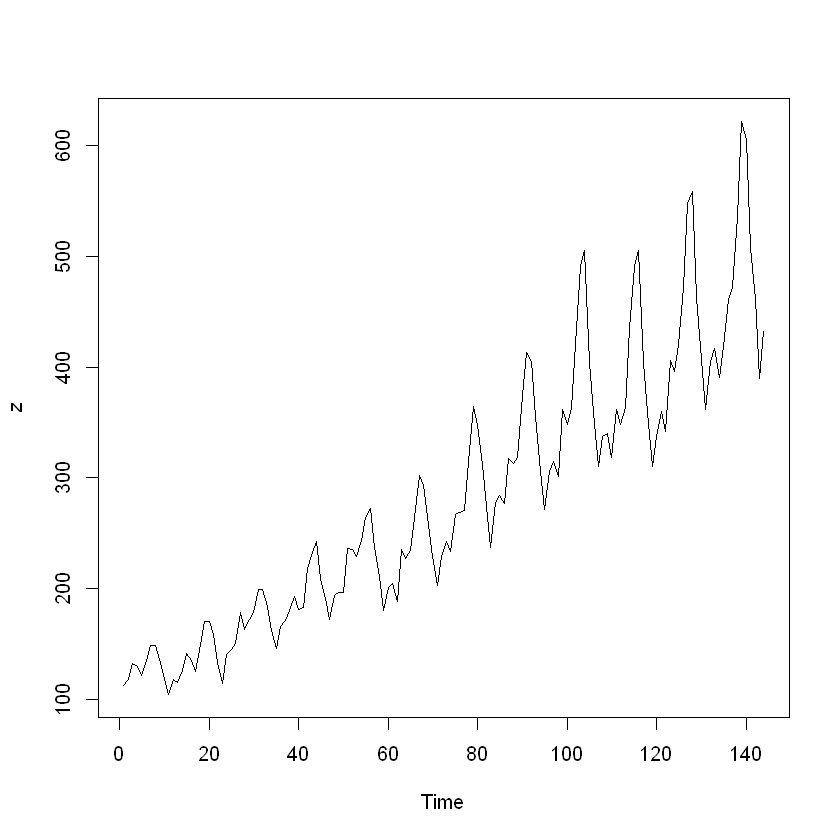

In [166]:
z <- scan('usapass.txt')
plot.ts(z) #불규칙성분, 추세성분 그리고 계절성분이 있는 것 처럼 보이며
#갈수록 분산이 커지는 이분산성을 가지는 것으로 보인다

#### 5-1

갈수록 분산이 커지는 이분산성을 갖고있는 자료이기 때문에
로그를 취해서 이분산성을 없애고 분석을 시행하는 것이 적절하다.

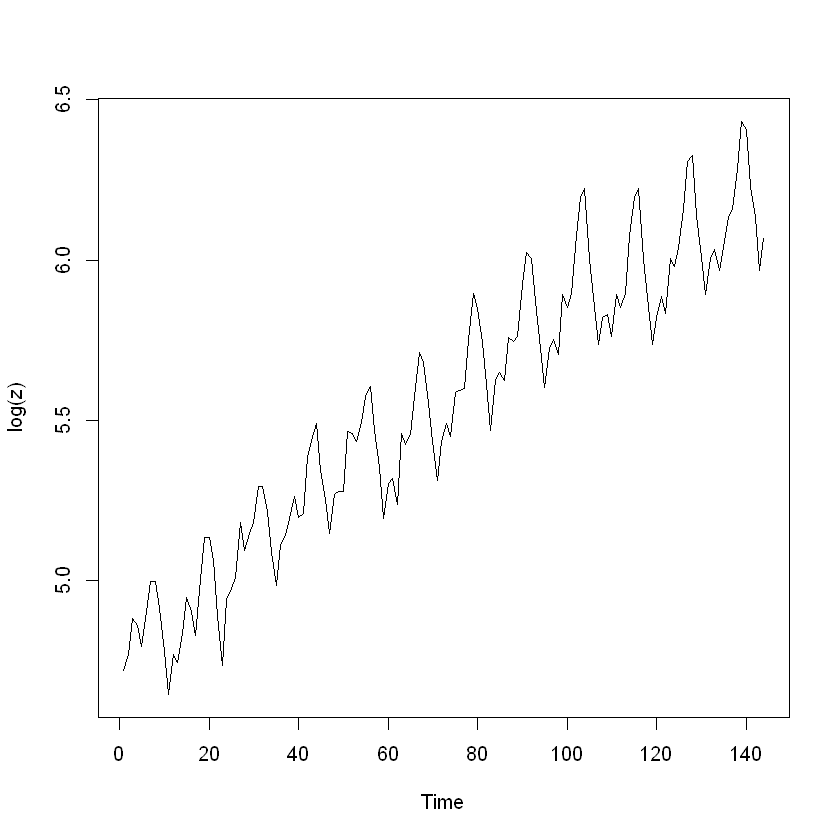

In [167]:
plot.ts(log(z)) #보다 이분산성이 사라진 모습.

#### 5-2

In [168]:
usapass <- ts(z, frequency = 12)
log_usapass <- log(usapass)
t <- 1:length(z)
tmp.data <- data.frame(t = t, #시점과 
                       z = z) #시계열 자료 데이터프레임에 저장

tmp.data %>% head()

tmp.data$log_usapass <- log(z)
tmp.data$y <-
  as.factor(as.integer(cycle(usapass))) #지시함수 사용을 위한 주기

#tibble에 저장
tmp.data <- tibble(tmp.data)

,t,z
,<int>,<dbl>
1,1,112
2,2,118
3,3,132
4,4,129
5,5,121
6,6,135


In [169]:
#지시함수를 이용하여 모형 적합
reg1 <- lm(log_usapass ~ 0 + t + y, data = tmp.data)
summary(reg1) #b_0 = 0이라는 제약조건 사용
round(reg1$coefficients,4) #적합된 계수들
# 시점이 1 증가할 때 마다 log_usapass 자료는 0.01009988 씩 오르며
#y1, y2, ... y12 는 각 월별 로그 평균이다.


Call:
lm(formula = log_usapass ~ 0 + t + y, data = tmp.data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.159814 -0.044426  0.000623  0.045572  0.151846 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
t   0.0100999  0.0001252   80.67   <2e-16 ***
y1  4.7246982  0.0198289  238.27   <2e-16 ***
y2  4.7026123  0.0198822  236.52   <2e-16 ***
y3  4.8342011  0.0199361  242.49   <2e-16 ***
y4  4.8015084  0.0199907  240.19   <2e-16 ***
y5  4.8009618  0.0200459  239.50   <2e-16 ***
y6  4.9237482  0.0201017  244.94   <2e-16 ***
y7  5.0296649  0.0201582  249.51   <2e-16 ***
y8  5.0223242  0.0202153  248.44   <2e-16 ***
y9  4.8708171  0.0202729  240.26   <2e-16 ***
y10 4.7357833  0.0203312  232.93   <2e-16 ***
y11 4.5905564  0.0203901  225.14   <2e-16 ***
y12 4.7032829  0.0204496  229.99   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06224 on 131 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted 

t     y1     y2     y3     y4     y5     y6     y7     y8     y9    y10 
0.0101 4.7247 4.7026 4.8342 4.8015 4.8010 4.9237 5.0297 5.0223 4.8708 4.7358 
   y11    y12 
4.5906 4.7033

적합된 모형은 $log(\widehat{Z_t}) = 0.0.0101t + 4.7247{I_1} + ... 4.7033{I_{12}}$\
또한 각 계수가 모두 유의한 것을 볼 수 있다.

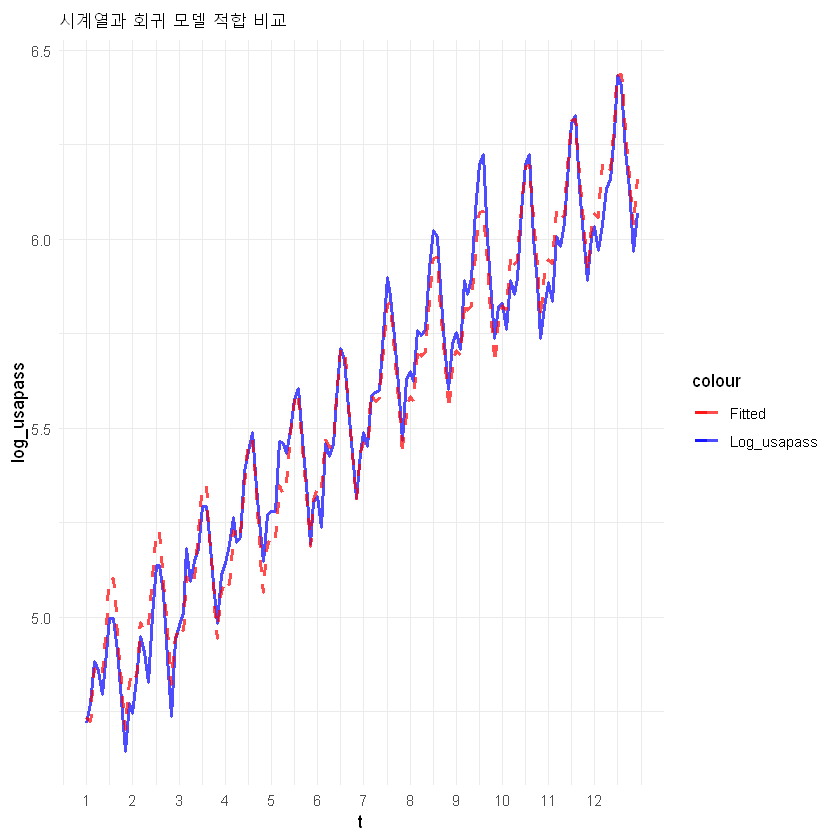

In [170]:
#적합값과 원시계열 비교
ggplot(data = tmp.data, aes(x = t)) +
  geom_line(aes(y = log_usapass, color = "Log_usapass"), size = 1, linetype = "solid", alpha = 0.7) +
  geom_line(aes(y = fitted(reg1), color = "Fitted"), size = 1, linetype = "dashed", alpha = 0.7) +
  labs(title = "시계열과 회귀 모델 적합 비교") +
  scale_x_continuous(breaks = seq(1, length(z), by = 12), labels = 1:12) +
  scale_color_manual(values = c("Log_usapass" = "blue", "Fitted" = "red")) +
  theme_minimal()

적합이 잘 된 것 같다.

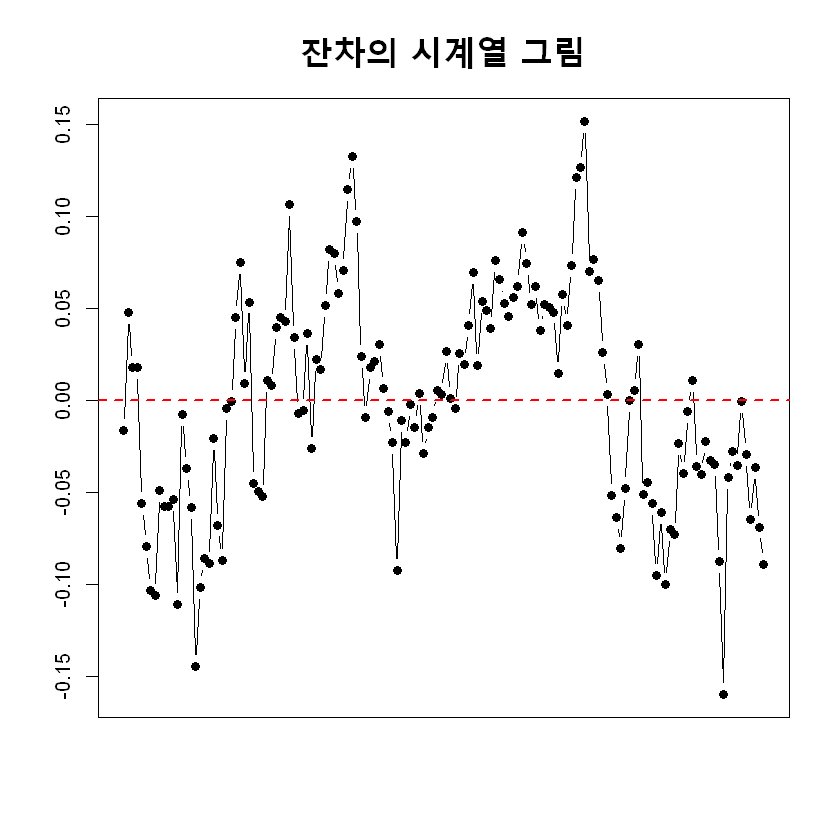

In [171]:
#잔차 분석
plot(
  tmp.data$t ,
  resid(reg1),
  pch = 16,
  cex = 1,
  xaxt = 'n',
  type = 'b', #dot connected plot
  xlab = "",
  ylab = "",
  main = "잔차의 시계열 그림",
  cex.main = 2
)
abline(
  h = 0,
  lty = 2 ,
  lwd = 2,
  col = 'red'
)

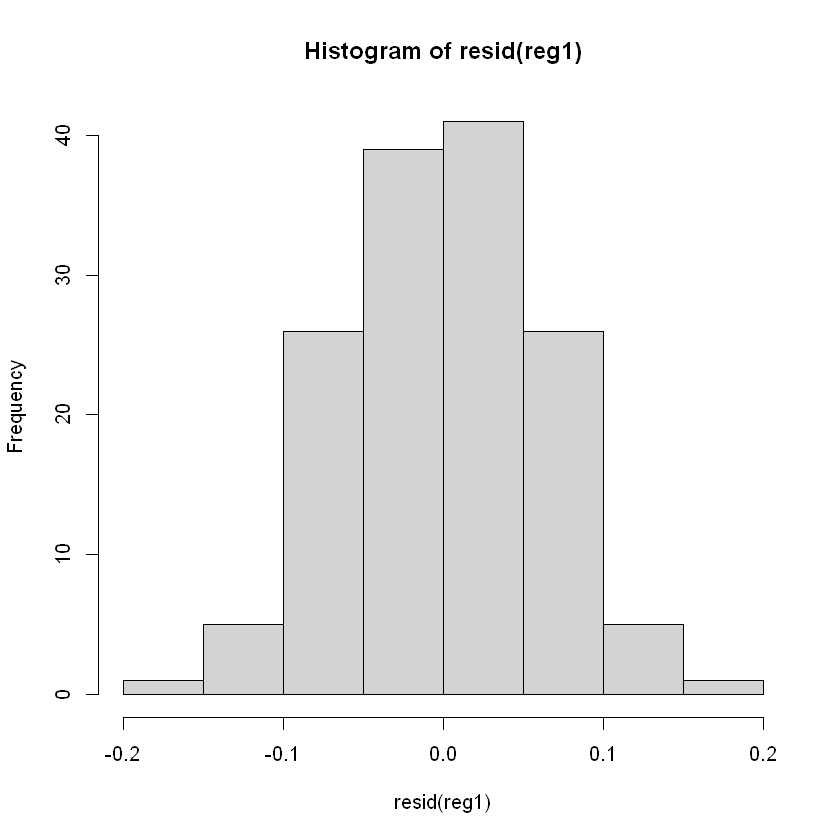

In [172]:
hist(resid(reg1))

잔차는 0근처에 대부분 몰려있으며 대칭성을 띄는 것 같다.

In [173]:
#잔차는 무상관일까?
dwtest(reg1 , alternative = 'two.sided')
#DW 값이 0.40831이며 p-value가 2.2e-16 보다 작다.
#따라서 양의 자기상관이 있다는 것을 알 수 있다.
#아직 잔차에 예측에 대한 정보가 들어있다.


	Durbin-Watson test

data:  reg1
DW = 0.40831, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


In [174]:
#shapiro test
shapiro.test(resid(reg1))
#p-값이 0.8828 로 잔차들이 정규분포를 따른다.


	Shapiro-Wilk normality test

data:  resid(reg1)
W = 0.99474, p-value = 0.8828


In [175]:
#bp test, 이분산성 
bptest(reg1) #p-value = 0.9202이므로 이분산성은 없다.


	studentized Breusch-Pagan test

data:  reg1
BP = 5.9163, df = 12, p-value = 0.9202


In [176]:
t.test(resid(reg1)) #p-value가 1 따라서 잔차의 평균은 0이다.


	One Sample t-test

data:  resid(reg1)
t = -4.4287e-17, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.009812747  0.009812747
sample estimates:
    mean of x 
-2.198521e-19 


#### 5-3

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log_usapass, seasonal = "additive")

Smoothing parameters:
 alpha: 0.3447498
 beta : 0.003585913
 gamma: 0.879488

Coefficients:
            [,1]
a    6.165298459
b    0.008744433
s1  -0.073696849
s2  -0.142822821
s3  -0.039964334
s4   0.015968620
s5   0.033673237
s6   0.157016140
s7   0.300626468
s8   0.285698068
s9   0.098491289
s10 -0.021898771
s11 -0.190036243
s12 -0.096734648

alpha 
0.3447498

beta 
0.003585913

gamma 
0.879488

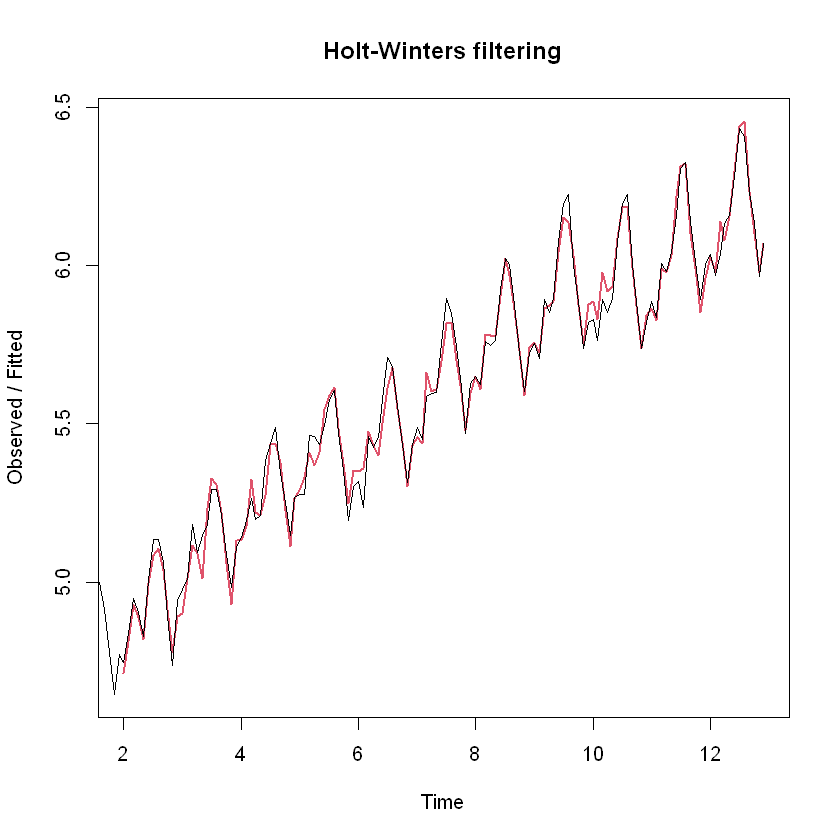

In [177]:
#### Holt Winters additive model
fit_hw <- HoltWinters(log_usapass, seasonal = 'additive') #로그를 취한 가법모형
fit_hw

plot(fit_hw, lwd = 2) #원래 시계열 자료와 평활한 값들의 시도표

fit_hw$alpha;fit_hw$beta;fit_hw$gamma

In [178]:
fit_hw2 = hw(
  log_usapass,
  alpha = fit_hw$alpha,
  beta = fit_hw$beta,
  gamma = fit_hw$gamma,
  seasonal = "additive",
  initial = "simple",
  h = 12
)

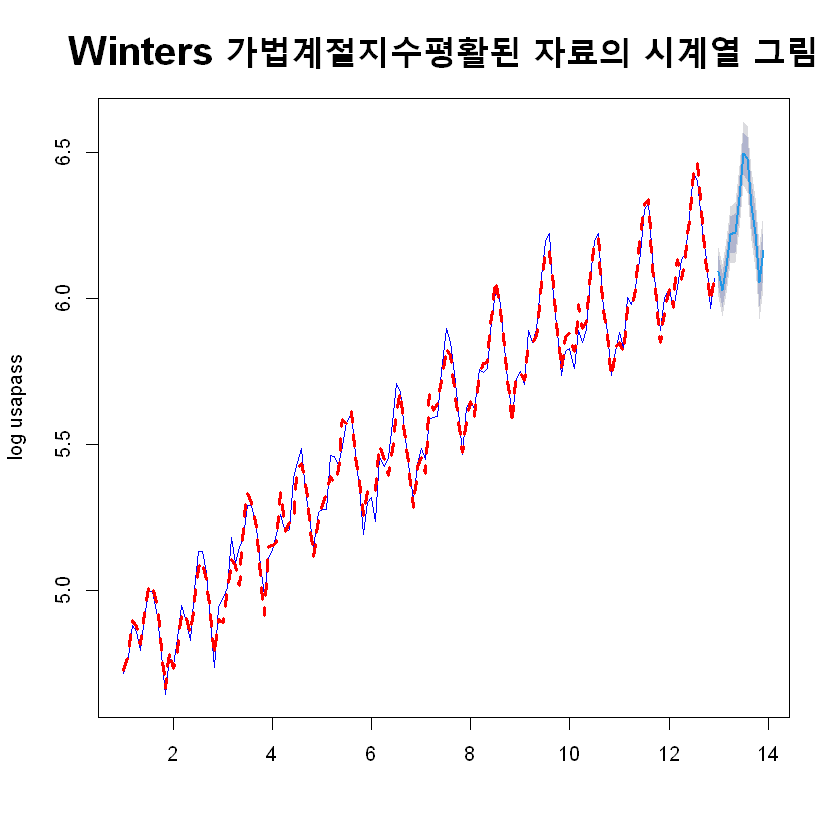

In [179]:
plot(
  fit_hw2,
  ylab = "log usapass",
  xlab = "",
  lty = 1,
  col = "blue",
  main = "Winters 가법계절지수평활된 자료의 시계열 그림",
  cex.main = 2
) #예측구간이 잘 생기게 되었다.
lines(fit_hw2$fitted,
      lwd = 3 ,
      col = 'red' ,
      lty = 2)
#fit_hw2를 통해 평활한 값

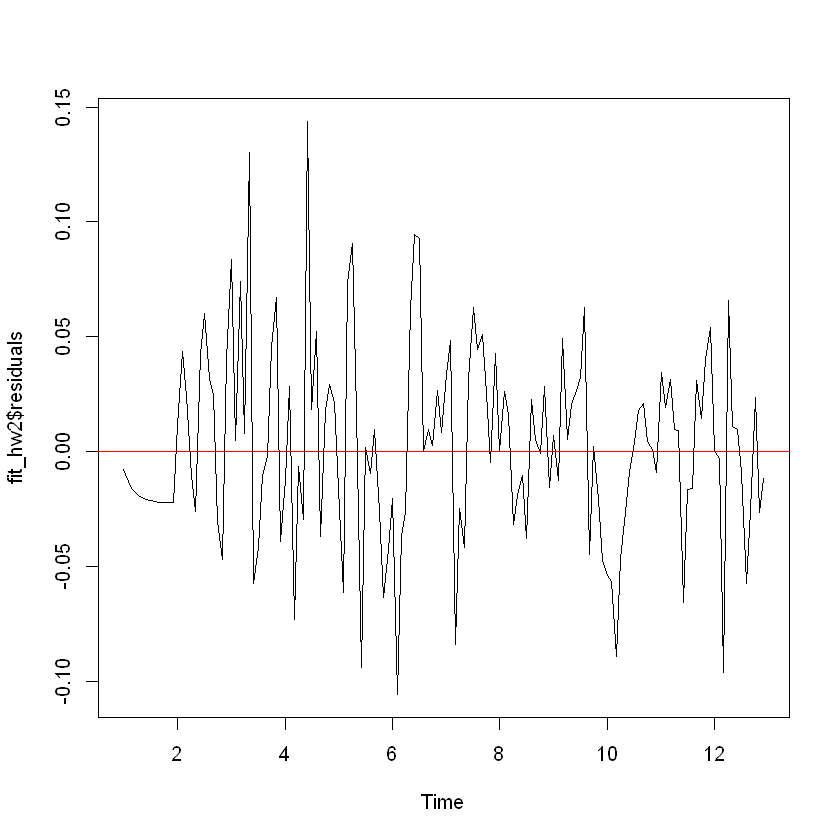

In [180]:
ts.plot(fit_hw2$residuals) #잔차그림
abline(h=0, col = 'red')
#우뚝 솟은 두개의 값을 제외하면 이분산성을 갖지 않는 것 같다.

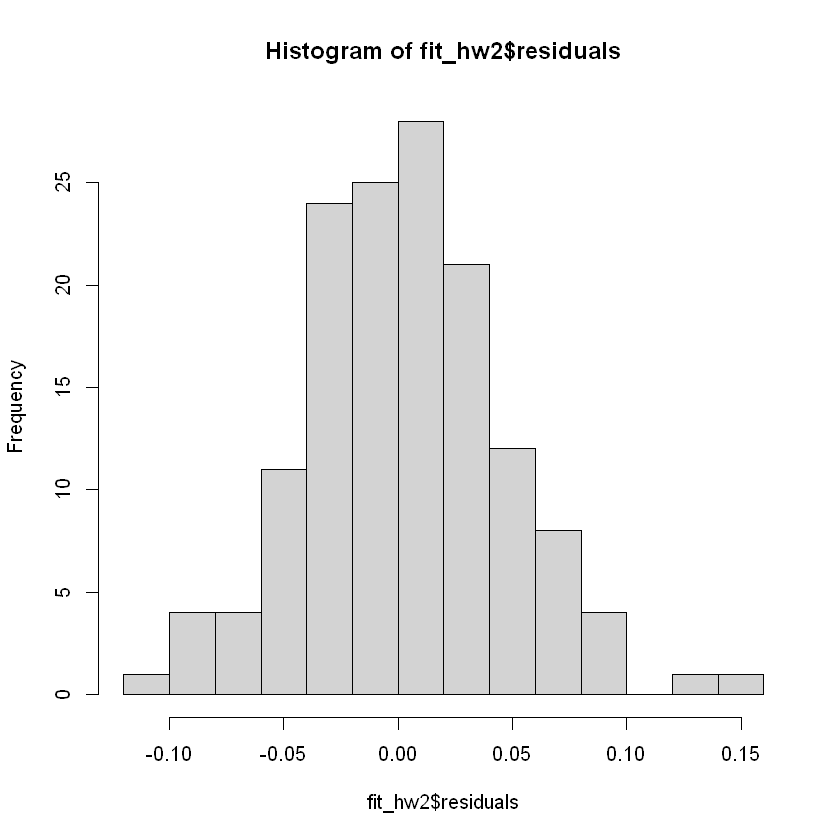

In [181]:
hist(fit_hw2$residuals) #이상점을 제외하면 잔차가 대칭인 것 같다

In [182]:
#### dw test  오차는 무상관인가?
dwtest(lm(fit_hw2$residual ~ 1), alternative = 'two.sided')


	Durbin-Watson test

data:  lm(fit_hw2$residual ~ 1)
DW = 1.5421, p-value = 0.005659
alternative hypothesis: true autocorrelation is not 0


DW = 1.5421, p-value = 0.005659 이므로 양의 자기상관관계가 남아있다.

In [183]:
#잔차의 평균은 0 인가?
t.test(fit_hw2$residuals)
#p-value =  0.4702 이므로 잔차의 평균은 0 이다.


	One Sample t-test

data:  fit_hw2$residuals
t = 0.72402, df = 143, p-value = 0.4702
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.004441394  0.009575433
sample estimates:
  mean of x 
0.002567019 


#### 5-4-1

`Precaution:` 이동평균과 추세분석를 이용해 각각 분해법을 적용하였습니다.

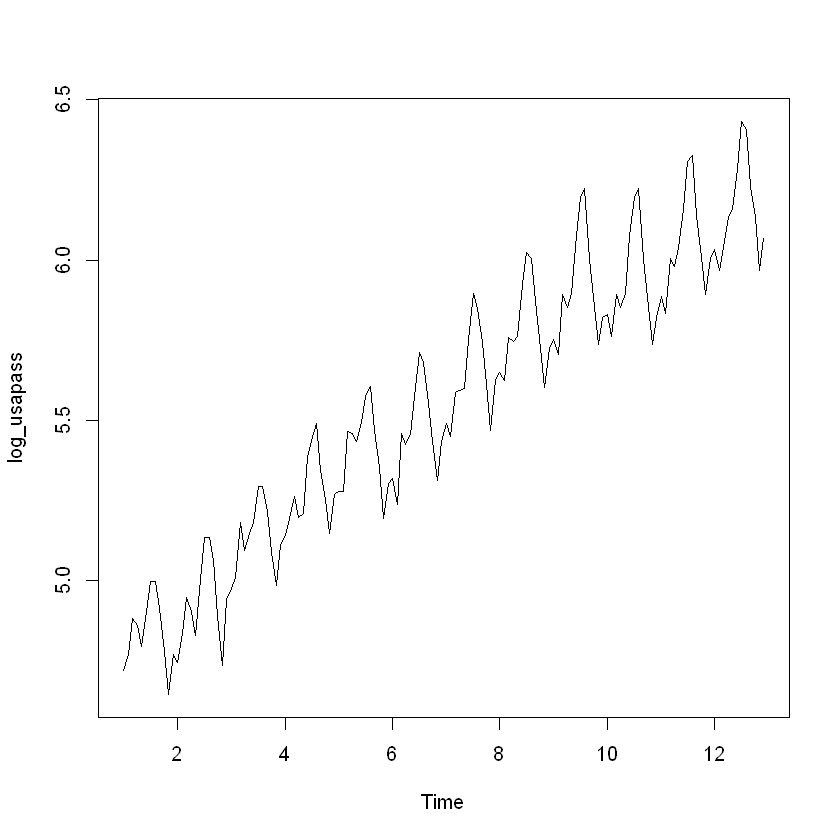

In [184]:
#추세에 의한 분해법
log_usapass <- ts(log(z), frequency =12)
t <- 1:length(z)
ts.plot(log_usapass) #이분산성이 사라진 모습.

In [185]:
fit <- lm(log_usapass ~ t) #추세 적합.
summary(fit)
#적합된 회귀계수는 beta0 = 4.8131072, beta1 = 0.0100802 이다.
#적합된 추세는 Z_t_hat = 4.8131072 + beta1*t (Z_t_hat은 로그변환 되어있다.)


Call:
lm(formula = log_usapass ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30875 -0.10481 -0.01736  0.09677  0.36311 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.8131072  0.0237011  203.07   <2e-16 ***
t           0.0100802  0.0002836   35.54   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1415 on 142 degrees of freedom
Multiple R-squared:  0.899,	Adjusted R-squared:  0.8982 
F-statistic:  1263 on 1 and 142 DF,  p-value: < 2.2e-16


$log(\widehat{T_t}) = 4.8131072 + 0.0100802t$

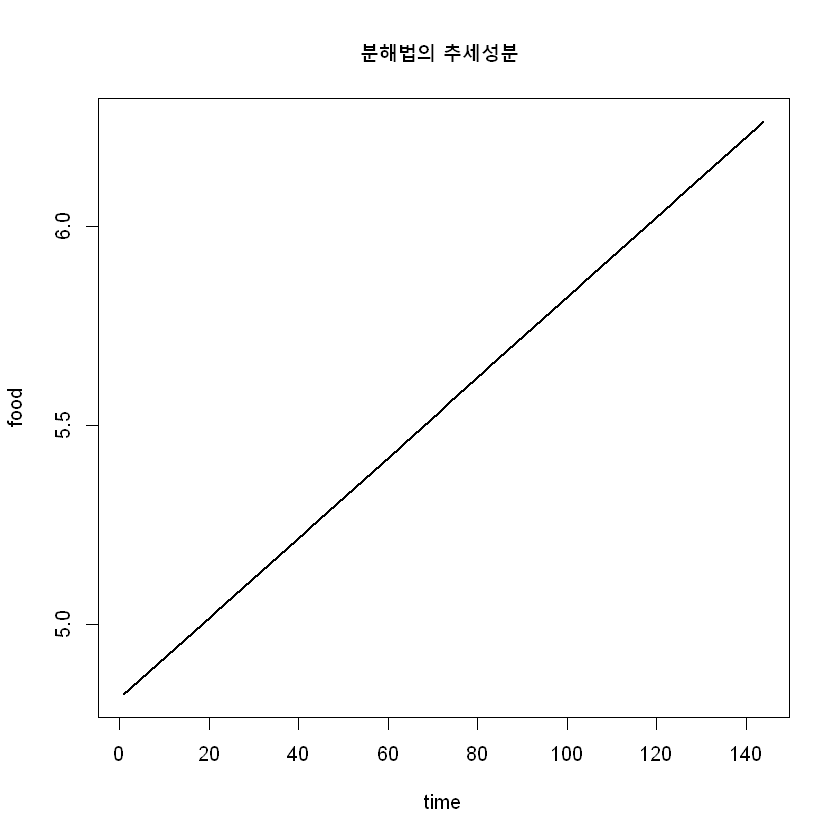

In [186]:
hat_Tt <- fitted(fit) #추세의 적합값
ts.plot(
  hat_Tt,
  col = 1:2,
  lty = 1:2,
  lwd = 2:3,
  ylab = "food",
  xlab = "time",
  main = "분해법의 추세성분 "
)

시각화를 해보았는데 로그변환된 관측치와 추정된 추세가 
더 개선될 여지가 보인다. 따라서 이차항을 추가하여 적합하여보자

In [187]:
fit1 <- lm(log_usapass ~ t + I(t^2)) #추세 적합.
summary(fit1)
#적합된 회귀계수는 beta0 = 4.734e+00, beta1 = 1.334e-02, beta2 =-2.246e-05이다.
#적합된 추세는 Z_t_hat = 4.734e+00 + 1.334e-02*t - 2.246e-05 * t^2
#(Z_t_hat은 로그변환 되어있다.)
hat_Tt <- fitted(fit1) #추세의 적합값


Call:
lm(formula = log_usapass ~ t + I(t^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29253 -0.09097 -0.02178  0.09452  0.34659 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.734e+00  3.487e-02 135.738  < 2e-16 ***
t            1.334e-02  1.110e-03  12.010  < 2e-16 ***
I(t^2)      -2.246e-05  7.418e-06  -3.027  0.00293 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1376 on 141 degrees of freedom
Multiple R-squared:  0.9051,	Adjusted R-squared:  0.9038 
F-statistic: 672.6 on 2 and 141 DF,  p-value: < 2.2e-16


$log(\widehat{T_t}) = 4.734 + 0.01334t - 0.00002246{t^2}$

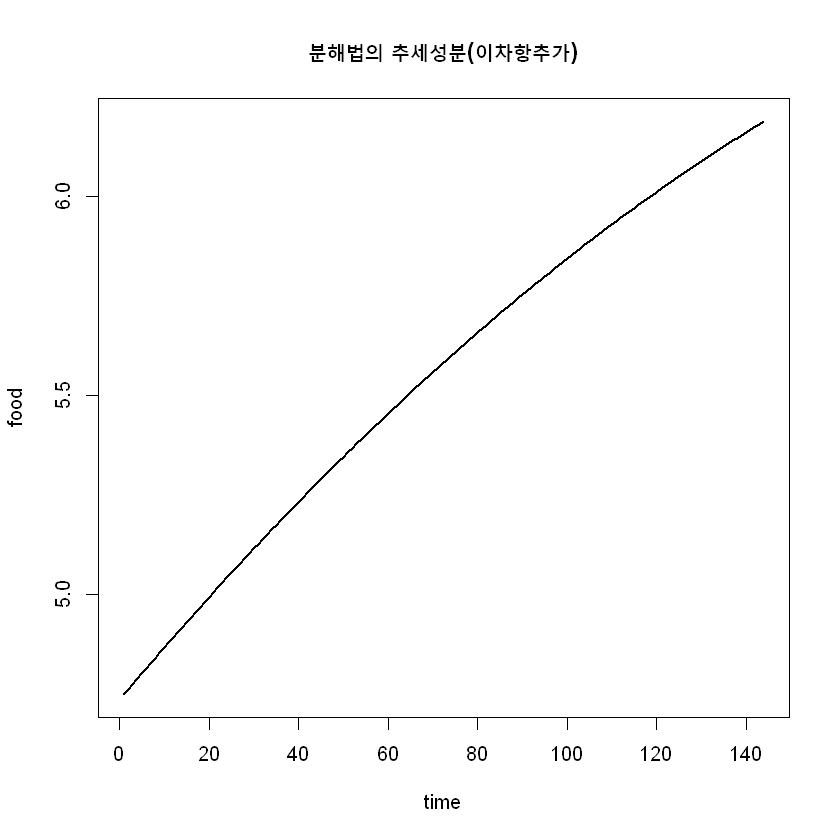

In [188]:
ts.plot(
  hat_Tt,
  col = 1:2,
  lty = 1:2,
  lwd = 2:3,
  ylab = "food",
  xlab = "time",
  main = "분해법의 추세성분(이차항추가)"
)
#보다 더 원시계열의 추세를 잘 나타내는 것 같다.

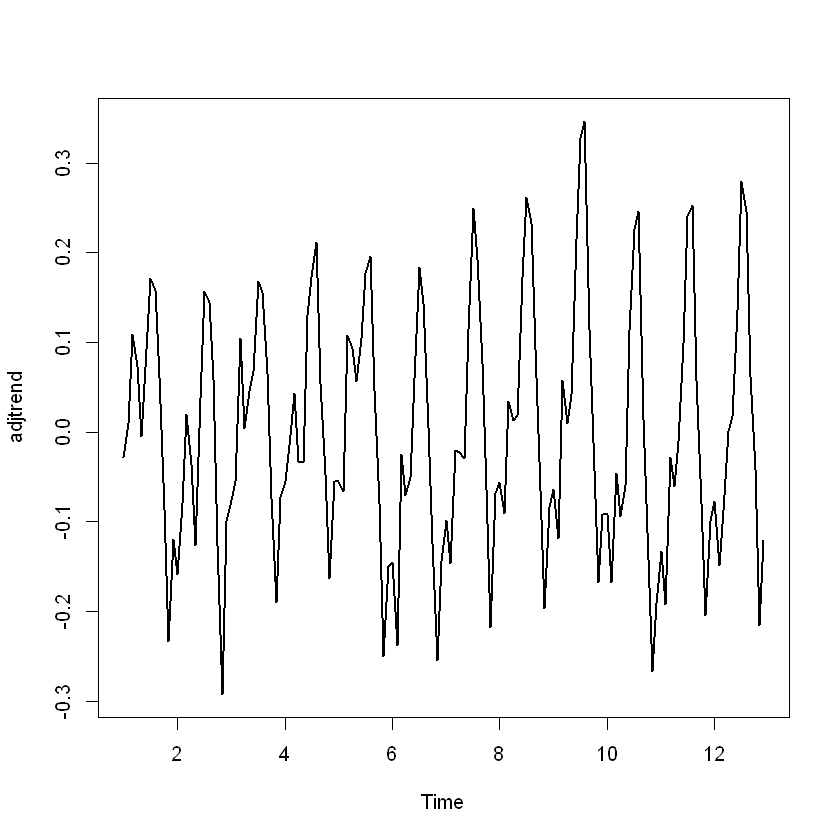

In [189]:
## 원시계열에서 추세성분  조정
adjtrend = log_usapass - hat_Tt
plot.ts(adjtrend, lwd = 2) #계절성분과 불규칙 성분만 남았다.

$\log(\widehat{S_t}) = -0.08668{I_1} - 0.10897{I_2} ... -0.10788{I_{12}}$

In [190]:
## 지시함수를 이용한 계절성분 추정
y = factor(cycle(adjtrend))  #범주형 변수로 변환
fit2 <- lm(adjtrend ~ 0 + y) #beta0 = 0 이라는 제약조건.
summary(fit2) #각 적합된 계수들은 주기별(월별) 평균값을 의미한다.
fit2$coefficients
#따라서 적합된 계절은
# 이다.


Call:
lm(formula = adjtrend ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.128997 -0.040338  0.001791  0.030654  0.136133 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1  -0.08668    0.01467  -5.909 2.76e-08 ***
y2  -0.10897    0.01467  -7.429 1.22e-11 ***
y3   0.02246    0.01467   1.531    0.128    
y4  -0.01035    0.01467  -0.705    0.482    
y5  -0.01096    0.01467  -0.748    0.456    
y6   0.11180    0.01467   7.622 4.34e-12 ***
y7   0.21773    0.01467  14.844  < 2e-16 ***
y8   0.21046    0.01467  14.348  < 2e-16 ***
y9   0.05906    0.01467   4.026 9.50e-05 ***
y10 -0.07582    0.01467  -5.169 8.50e-07 ***
y11 -0.22085    0.01467 -15.056  < 2e-16 ***
y12 -0.10788    0.01467  -7.355 1.81e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05081 on 132 degrees of freedom
Multiple R-squared:  0.8723,	Adjusted R-squared:  0.8607 
F-statistic: 75.13 on 12 and 132 DF,  p-value: < 2.2e-16


y1          y2          y3          y4          y5          y6 
-0.08667828 -0.10896906  0.02245980 -0.01034798 -0.01096475  0.11179645 
         y7          y8          y9         y10         y11         y12 
 0.21773289  0.21045678  0.05905914 -0.07582023 -0.22084777 -0.10787698

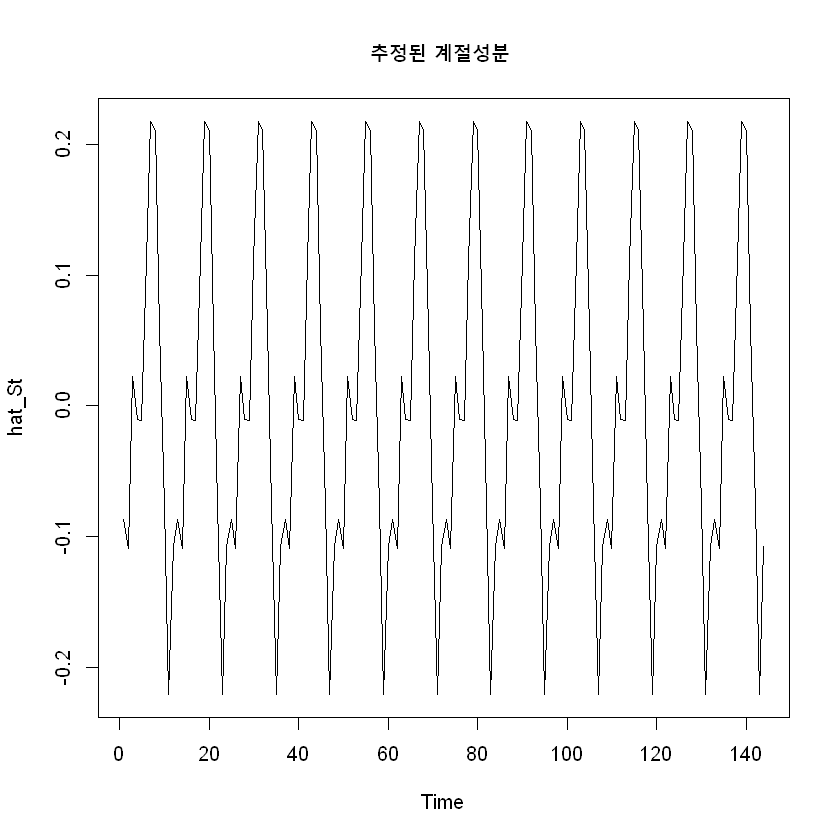

In [191]:
hat_St <- fitted(fit2) #계절성분의 적합값.
ts.plot(hat_St, main = "추정된 계절성분 ")

$\widehat{I_t} =  log{Zt} - \widehat{T_t} - \widehat{S_t}$

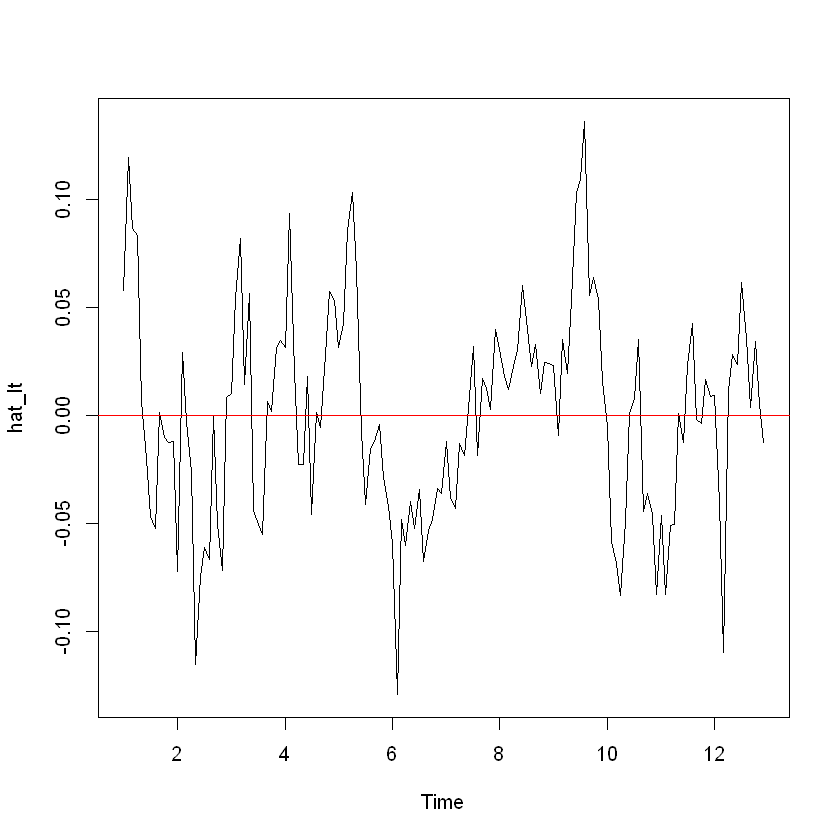

In [192]:
#3 불규칙 성분
hat_It <- log_usapass - hat_Tt - hat_St
ts.plot(hat_It) #적합된 불규칙성분(잔차)들이 일정 경계안에 들어있는 것 같다.
abline(h = 0,col = 'red')
#이분산성이 보이진 않는다.

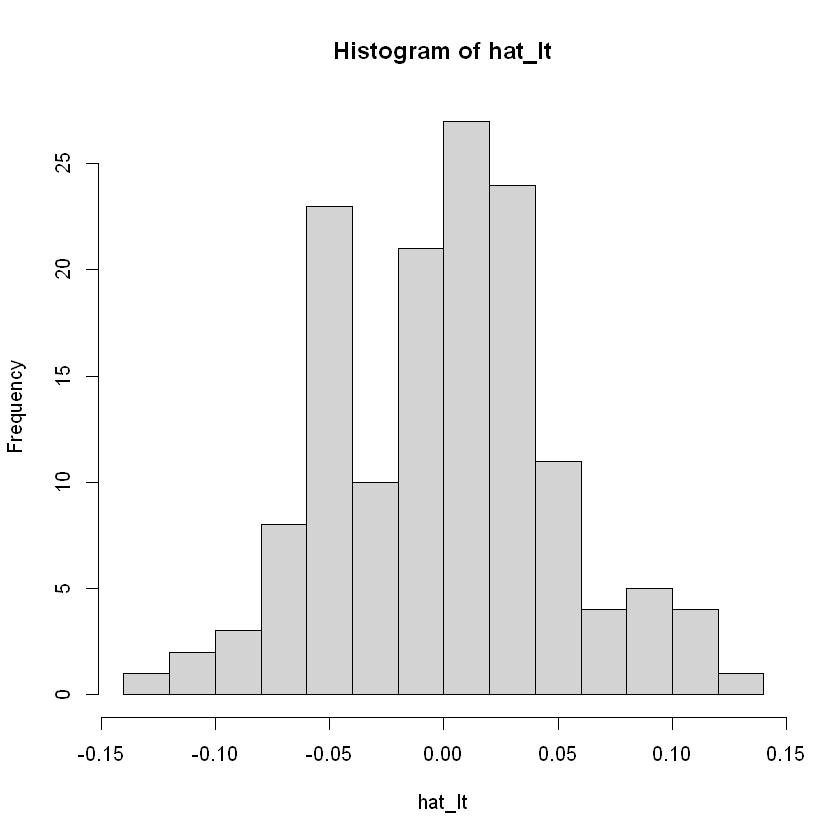

In [193]:
hist(hat_It,breaks = 10)

In [194]:
t.test(hat_It)  #H0 : mu=E(It)=0
#p-value = 1 이므로 잔차의 평균은 0이다.


	One Sample t-test

data:  hat_It
t = -1.8292e-16, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.008041498  0.008041498
sample estimates:
    mean of x 
-7.441302e-19 


In [195]:
dwtest(lm(hat_It ~ 1),
       alternative =  'two.sided')
#DW-값이 0에 가까우며 p-value가 2.2e-16 보다 작으므로
#잔차에 양의자기상관관계가 있음을 알 수 있다.
#따라서 잔차를 무상관하게 만들어줄 조치가 필요하다.


	Durbin-Watson test

data:  lm(hat_It ~ 1)
DW = 0.60733, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


#### 5-4-2

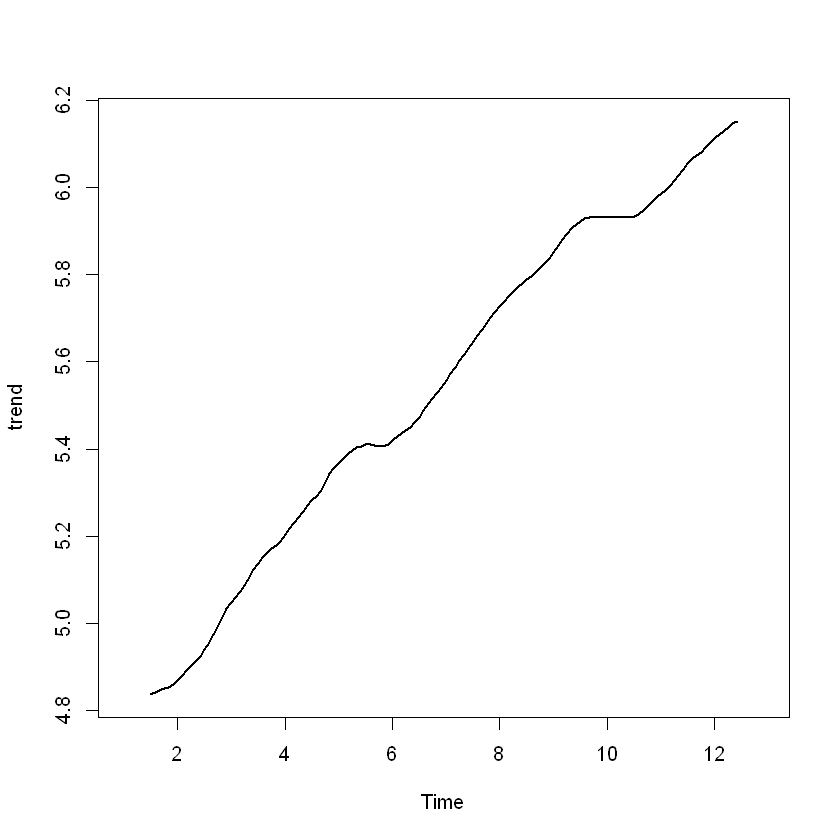

In [196]:
#이동평균을 이용한 분해법 

#1 추세성분: 계절주기와 동일한 m을 이용한 중심이동평균
trend = ma(log_usapass, 12)
plot.ts(trend, lwd = 2) #추세성분만 남게 되었다.

In [197]:
#2 계절성분: 추세가 조정된 시계열에서
#각 계절성분의 평균을 구한 후, 평균을
#0으로 조정

trend #앞 6게 뒤 6개 NA 값

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,NA,NA,NA,NA,NA,NA,4.837280,4.841114,4.846596,4.851238,4.854488,4.859954
2,4.869840,4.881389,4.893411,4.904293,4.912752,4.923701,4.940483,4.957406,4.974380,4.991942,5.013095,5.033804
3,5.047776,5.060902,5.073812,5.088378,5.106906,5.124312,5.138282,5.152751,5.163718,5.171454,5.178401,5.189431
4,5.203909,5.218093,5.231553,5.243722,5.257413,5.270736,5.282916,5.292150,5.304079,5.323338,5.343560,5.357427
5,5.367695,5.378309,5.388417,5.397805,5.403849,5.407220,5.410364,5.410294,5.408381,5.406761,5.406218,5.410571
6,5.419628,5.428330,5.434966,5.441915,5.450336,5.460781,5.473332,5.489391,5.503652,5.516045,5.529081,5.542402
7,5.557542,5.572370,5.587337,5.602730,5.616658,5.631189,5.645937,5.659812,5.674172,5.687636,5.700766,5.714738
8,5.727153,5.738856,5.750676,5.760658,5.770846,5.780430,5.788745,5.796524,5.805517,5.815465,5.825396,5.837206
9,5.850710,5.867113,5.881695,5.893738,5.905996,5.915619,5.922822,5.928293,5.930582,5.930582,5.930582,5.930582
10,5.930582,5.930582,5.930582,5.930582,5.930582,5.930582,5.932964,5.938377,5.946188,5.956352,5.967813,5.977291


1            2            3            4            5            6 
-0.088584764 -0.117182593  0.016863017 -0.015815356 -0.009709938  0.115381499 
           7            8            9           10           11           12 
 0.212992756  0.208854397  0.061714927 -0.074950318 -0.217137127 -0.102814659


Call:
lm(formula = adj_trend ~ 0 + as.factor(cycle(adj_trend)))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.107374 -0.016935  0.000902  0.018152  0.092046 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
as.factor(cycle(adj_trend))1  -0.08858    0.01106  -8.011 8.34e-13 ***
as.factor(cycle(adj_trend))2  -0.11718    0.01106 -10.597  < 2e-16 ***
as.factor(cycle(adj_trend))3   0.01686    0.01106   1.525    0.130    
as.factor(cycle(adj_trend))4  -0.01581    0.01106  -1.430    0.155    
as.factor(cycle(adj_trend))5  -0.00971    0.01106  -0.878    0.382    
as.factor(cycle(adj_trend))6   0.11538    0.01106  10.434  < 2e-16 ***
as.factor(cycle(adj_trend))7   0.21299    0.01106  19.261  < 2e-16 ***
as.factor(cycle(adj_trend))8   0.20885    0.01106  18.887  < 2e-16 ***
as.factor(cycle(adj_trend))9   0.06171    0.01106   5.581 1.51e-07 ***
as.factor(cycle(adj_trend))10 -0.07495    0.01106  -6.778 4.84e-10 ***
as.factor(cycle(adj_trend

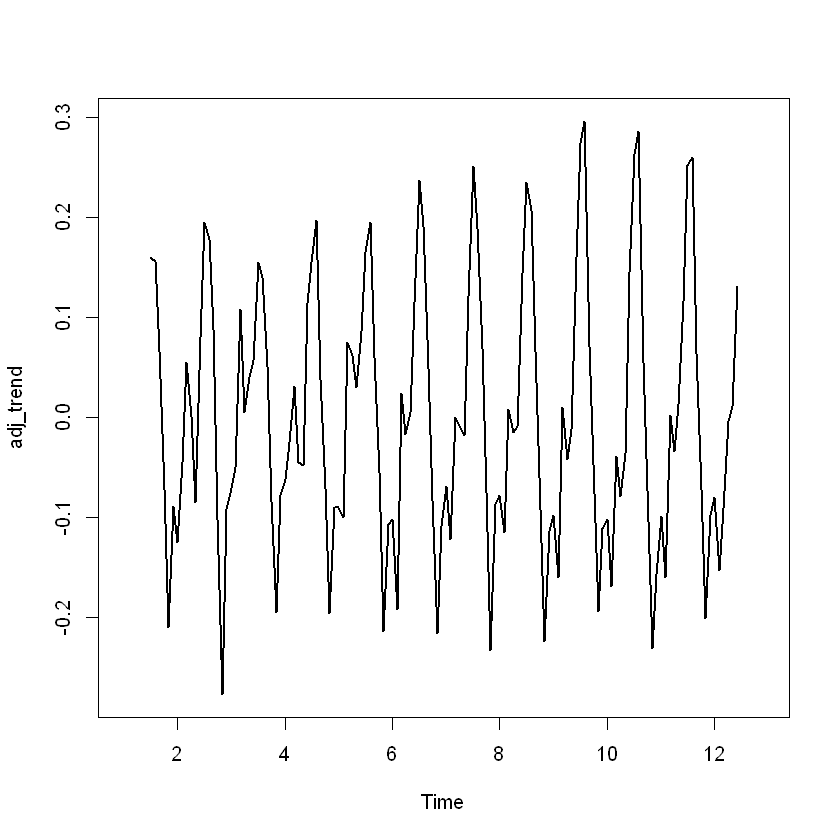

In [198]:
adj_trend <- log_usapass - trend
plot.ts(adj_trend, lwd = 2) #불규칙 성분과 계절성분이 남게 되었다.

seasonal <- #계절성분만 남기도록 하자. beta = 0 인 제약조건을 사용한 회귀적합과 같다.
  tapply(adj_trend, cycle(adj_trend), function(y)
    mean(y, na.rm = T))
seasonal #적합된 계절성분 (계절별 평균)

summary(lm(adj_trend ~ 0 + as.factor(cycle(adj_trend)))) #위와 같다.
#각 계수들은 로그 시계열 자료의 월별 평균이다.

[1] -0.00086568

1            2            3            4            5            6 
-0.087719084 -0.116316913  0.017728697 -0.014949676 -0.008844258  0.116247179 
           7            8            9           10           11           12 
 0.213858436  0.209720077  0.062580607 -0.074084638 -0.216271447 -0.101948979

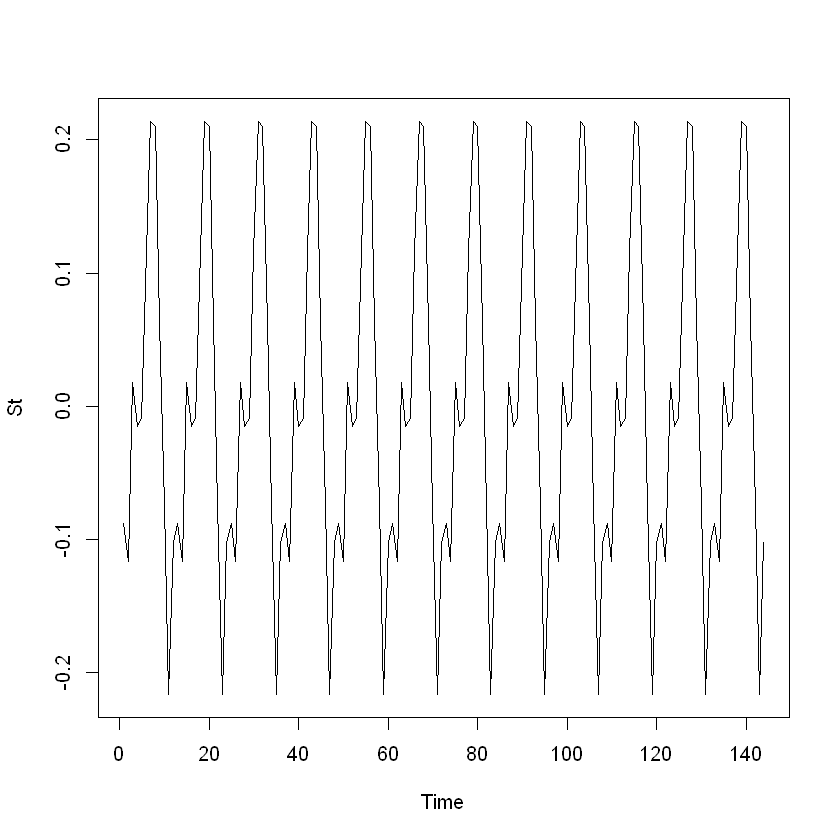

In [199]:
mean(seasonal)

seasonal <- seasonal - mean(seasonal)  #평균을  0으로 수정
seasonal #평균 조정이 끝난 계절성분

St = rep(seasonal, 12) #12년치 적합된 계절성분 
plot.ts(St) 

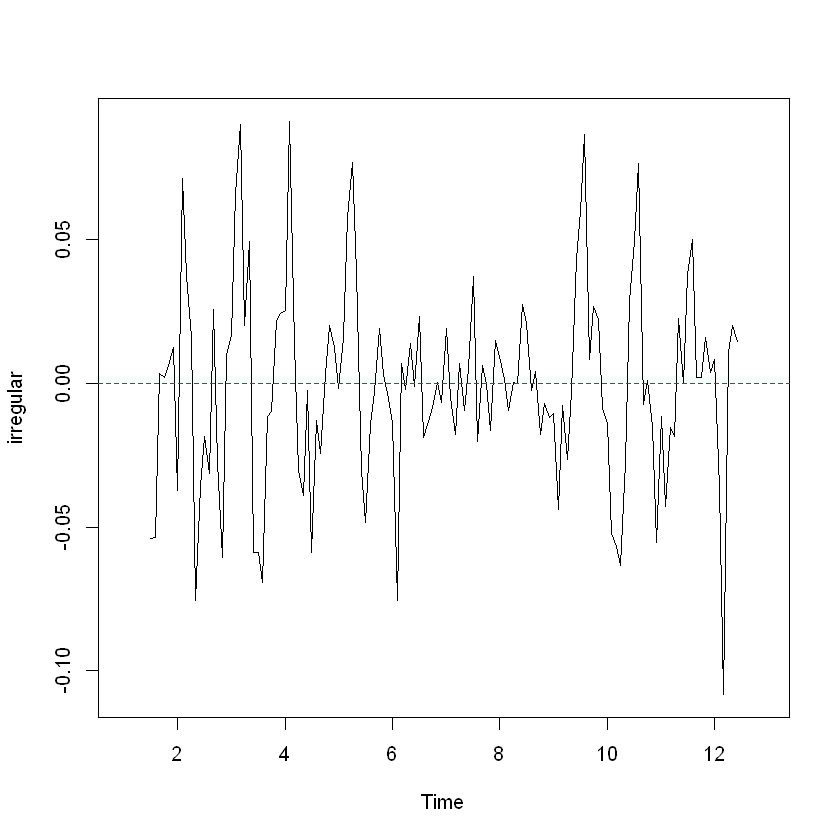

In [200]:
#3 불규칙 성분
irregular <- log_usapass - trend - St
plot.ts(irregular) #잔차 plot
abline(h = 0, lty = 2, col = 'red')

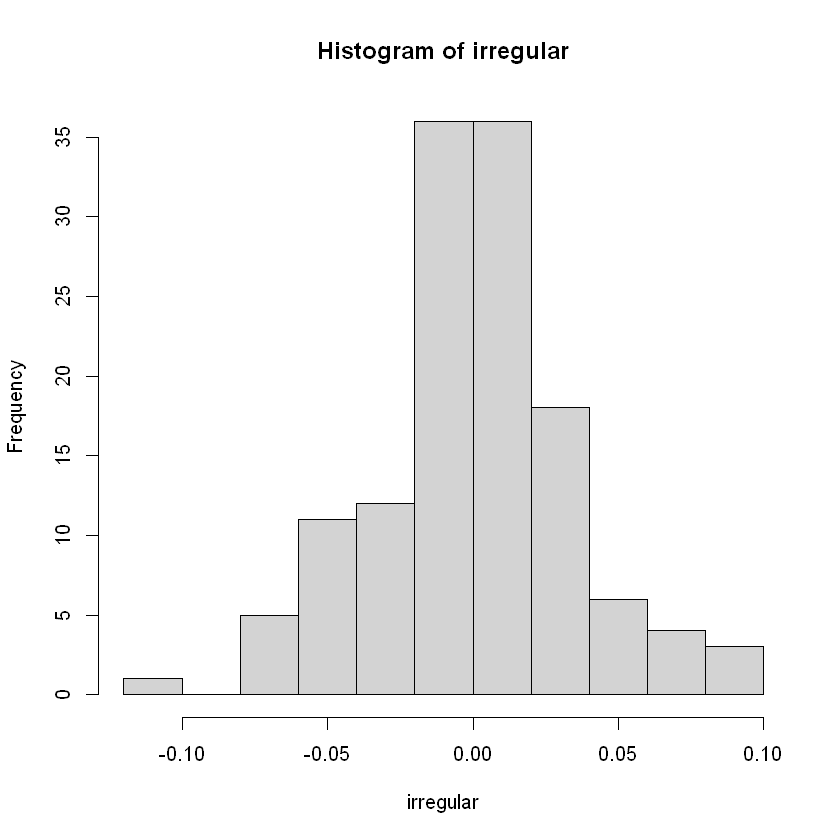

In [201]:
#잔차분석 
hist(irregular) #0을 중심으로 거의 대칭이다.

In [202]:
t.test(irregular) #평균이 0인가?
#p-value =0.7774 로 평균이 0 이라고 볼 수 있다.


	One Sample t-test

data:  irregular
t = -0.28335, df = 131, p-value = 0.7774
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.006909609  0.005178249
sample estimates:
  mean of x 
-0.00086568 


In [203]:
dwtest(lm(irregular ~ 1), alternative = 'two.sided') #오차는 무상관인가?
#DW = 1.1441, p-value = 7.258e-07 이므로 잔차는 양의 자기상관관계를 갖는다.
#아직 잔차에 예측에 대한 정보가 남아있는 것으로 보인다.


	Durbin-Watson test

data:  lm(irregular ~ 1)
DW = 1.1441, p-value = 7.258e-07
alternative hypothesis: true autocorrelation is not 0


#### 5-5

In [204]:
#log변환이 되어있었으므로 원래 단위로 변환하여 MSE를 구해준다.
mean((usapass - exp(reg1$fitted.values))^2) %>% round(5) #계절추세모형 적합을 통한 MSE = 342.14255
mean((usapass - exp(fit_hw2$fitted))^2)%>% round(5) #계절지수평활을 이용한 가법모형 MSE = 146.74928
mean((usapass - exp(hat_Tt + hat_St))^2)%>% round(5) #추세분석을 이용한 가법분해법 MSE = 216.24357
mean((usapass - exp(trend + St))^2,na.rm = T)%>% round(5) #이동평균법 평활에 의한 가법분해법을 통한 MSE = 115.78806

#이동평균법 평활에 의한 분해법이 1 시차 후 예측오차의 제곱합 관점에서
#가장 예측력이 좋은 모형이다.
#그리고 추세모형, 평활법, 추세에 의한 분해법 순서로 예측이 잘 되어있다.

[1] 342.1426

[1] 146.7493

[1] 216.2436

[1] 115.7881